In [1]:
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from numpy import array
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
import math
import operator
import tensorflow as tf
import random
import heapq
import time

import numpy as np
import matplotlib.pyplot as plt

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

In [2]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

('x_train shape:', (60000, 28, 28), 'y_train shape:', (60000,))


In [4]:
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

('x_test shape:', (10000, 28, 28), 'y_test shape:', (10000,))


In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
x_train_flat = x_train.flatten().reshape(60000, 784)
x_test_flat = x_test.flatten().reshape(10000, 784)
scaler = StandardScaler()
scaler.fit(x_train_flat)
x_train_flat = scaler.transform(x_train_flat)
x_test_flat = scaler.transform(x_test_flat)

In [7]:
#PCA for training data
A = x_train_flat
M = mean(x_train_flat.T, axis=1)
C = A - M
V = cov(C.T)
values, vectors = eig(V)
print(vectors)
print("------")
print(values)
print("------")
P = vectors.T.dot(C.T)
print(P.T)

[[  1.78230882e-04   1.04673842e-05  -3.33721545e-04 ...,  -1.63592980e-03
   -6.07858922e-04   5.34132651e-05]
 [  1.02322420e-03  -1.60519463e-03  -9.04414234e-04 ...,  -3.55863550e-04
    1.05531447e-03   7.08630784e-04]
 [  2.18792534e-03  -1.39610250e-03  -2.78035142e-03 ...,   7.02393906e-04
   -2.13024509e-04   1.17678302e-03]
 ..., 
 [  6.32791756e-03  -1.39374733e-02  -9.45983074e-03 ...,   1.24799205e-02
   -4.12639933e-03  -1.26935209e-02]
 [  1.63296309e-03  -9.55542511e-03   1.29401503e-03 ...,  -2.92830238e-03
   -3.73403249e-03   2.97729972e-03]
 [  7.79545725e-04  -4.30304157e-03   9.09359218e-04 ...,   1.36665770e-03
    1.00770794e-03   3.15400921e-03]]
------
[  1.73138950e+02   1.13013417e+02   4.28166171e+01   3.98959494e+01
   3.17906601e+01   2.36734891e+01   2.15414661e+01   1.81396560e+01
   1.32704788e+01   1.03339686e+01   9.17400176e+00   7.54529656e+00
   7.10703621e+00   6.75064517e+00   5.82568236e+00   5.72584963e+00
   5.18657523e+00   4.95117235e+00   

[[ -8.00995569e-01  -2.08666122e+01   1.29454176e+01 ...,  -7.80716615e-01
   -4.99525230e-02  -2.70660171e-01]
 [  1.70740149e+01   4.96961181e+00   2.07743718e+00 ...,   1.20952195e-01
   -2.88872501e-02   3.39594768e-02]
 [ -9.60196078e+00   1.22959356e+01  -1.08267660e+00 ...,  -1.78872438e-01
    4.19840243e-02   4.53147499e-02]
 ..., 
 [  9.37739064e+00   1.31062403e+01   8.83836031e+00 ...,  -8.26055917e-02
   -1.34484995e-01   1.24309482e-01]
 [ -9.64590092e+00   7.09520548e+00  -6.94554077e+00 ...,   2.47179839e-02
   -2.58594350e-02   3.28697835e-03]
 [ -2.13172358e+01   1.74087778e+00  -5.47631156e+00 ...,  -1.83235907e-01
   -3.29579877e-02   2.84841071e-01]]


In [8]:
values_index = sorted(range(len(values)), key=lambda k: values[k], reverse = True)
print(values_index)
values_sorted = sorted(values, reverse = True)
print(values_sorted)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 82, 84, 85, 87, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 146, 150, 151, 152, 153, 154, 155, 158, 157, 156, 159, 160, 161, 165, 164, 163, 162, 167, 166, 168, 169, 170, 173, 172, 171, 174, 175, 177, 176, 178, 179, 180, 182, 183, 184, 185, 181, 186, 187, 188, 189, 190, 191, 192, 194, 193, 195, 196, 197, 198, 199, 201, 200, 202, 203, 204, 205, 206, 207, 208, 211, 212, 214, 213, 209, 210, 215, 216, 217, 218, 219, 222, 223,

[ 173.13894963  286.15236694  328.96898402  368.86493338  400.65559343
  424.32908248  445.87054855  464.01020458  477.28068336  487.61465193
  496.78865369  504.33395025  511.44098646  518.19163162  524.01731398
  529.74316361  534.92973884  539.88091118  544.75699921  549.3380953
  553.44178309  557.44902913  561.16160996  564.69034326  568.12988149
  571.39997768  574.52305724  577.58507431  580.54612953  583.47467366
  586.32172654  589.07850102  591.71325947  594.30779372  596.87978201
  599.36903248  601.76199883  604.08799639  606.32014189  608.53961458
  610.70029235  612.8026467   614.85986639  616.85535902  618.79603699
  620.67962873  622.54537704  624.33586972  626.07690667  627.77087193
  629.42094957  631.04536246  632.63605987  634.20883129  635.76795672
  637.2900178   638.76816706  640.21804653  641.63234829  643.01912801
  644.38983276  645.73315791  647.06050004  648.34339007  649.60583027
  650.85754439  652.06310708  653.24557257  654.41127263  655.55741436
  656.6

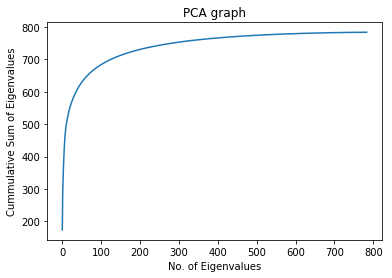

In [9]:
#plotting cummulative sum of eigenvalues vs no. of eigenvalues to see cutoff for no. of principal components
cumm_sum = np.zeros((784))
till_now = 0.0
for i in range(784):
    cumm_sum[i] = till_now + values_sorted[i]
    till_now = till_now + values_sorted[i]
no_of_eigenvalues = range(784)
print(cumm_sum)
plt.plot(no_of_eigenvalues, cumm_sum)
# plt.axis([0, 800, cumm_sum.min(), cumm_sum.max()])
plt.xlabel("No. of Eigenvalues")
plt.ylabel("Cummulative Sum of Eigenvalues")
plt.title("PCA graph")
plt.show()

In [10]:
# final_columns = sorted(values_index[0:400])
# #final_columns
# x_train_final = x_train_flat[:, final_columns]
# x_train_final
x_train_final = P.T[:, 0:400]
x_train_final

array([[ -8.00995569e-01,  -2.08666122e+01,   1.29454176e+01, ...,
         -7.15959319e-03,   4.25953112e-02,   4.94348629e-02],
       [  1.70740149e+01,   4.96961181e+00,   2.07743718e+00, ...,
          1.42837516e-01,  -3.79783228e-02,   4.50109749e-02],
       [ -9.60196078e+00,   1.22959356e+01,  -1.08267660e+00, ...,
         -8.32956976e-03,  -2.75582070e-02,  -2.49982083e-02],
       ..., 
       [  9.37739064e+00,   1.31062403e+01,   8.83836031e+00, ...,
         -3.76303081e-02,  -1.09014713e-01,  -5.88697944e-02],
       [ -9.64590092e+00,   7.09520548e+00,  -6.94554077e+00, ...,
          4.42421592e-02,  -2.50474007e-03,  -4.82739584e-02],
       [ -2.13172358e+01,   1.74087778e+00,  -5.47631156e+00, ...,
          5.70682600e-02,  -2.61958460e-02,  -1.13681089e-01]])

In [11]:
x_train_final.shape

(60000, 400)

In [12]:
#PCA for test data
C_test = x_test_flat - M
P_test = vectors.T.dot(C_test.T)
print(P_test.T)

[[ -1.67076808e+01  -7.35964145e+00   2.13991411e+00 ...,  -1.07552105e-01
   -1.06159529e-01   1.75543023e-01]
 [  2.23005990e+01  -9.56058753e+00  -1.06565302e+01 ...,  -5.12570301e-01
    2.59388300e-02  -2.32057457e-02]
 [  3.87146626e+00   1.67811981e+01   8.41485301e+00 ...,  -2.21036887e-02
   -4.81780203e-02  -8.40941287e-03]
 ..., 
 [ -7.00251634e+00   8.46510338e+00  -2.66657090e-01 ...,  -3.46262422e-02
   -1.05544444e-01  -1.67705783e-01]
 [ -2.90231603e+00   1.53565409e+01   7.56899220e+00 ...,   1.79640473e-01
   -5.48833701e-02   1.83059305e-01]
 [ -1.75188030e+01  -1.52758843e-01  -3.27344114e+00 ...,  -5.54595467e-02
   -8.77809689e-02   1.68503589e-01]]


In [13]:
x_test_final = P_test.T[:, 0:400]
x_test_final

array([[ -1.67076808e+01,  -7.35964145e+00,   2.13991411e+00, ...,
         -8.87795266e-03,   3.84571953e-03,   1.16815789e-02],
       [  2.23005990e+01,  -9.56058753e+00,  -1.06565302e+01, ...,
          9.18606856e-02,  -9.05458495e-02,   5.22149215e-02],
       [  3.87146626e+00,   1.67811981e+01,   8.41485301e+00, ...,
         -2.63781712e-02,   3.84388374e-02,   1.12314980e-02],
       ..., 
       [ -7.00251634e+00,   8.46510338e+00,  -2.66657090e-01, ...,
          4.53083783e-02,   1.15969681e-01,   1.12736360e-02],
       [ -2.90231603e+00,   1.53565409e+01,   7.56899220e+00, ...,
          3.25317081e-02,   1.82054013e-01,   1.01910709e-02],
       [ -1.75188030e+01,  -1.52758843e-01,  -3.27344114e+00, ...,
         -1.03590770e-01,   9.25265114e-02,   1.45897744e-01]])

In [14]:
x_test_final.shape

(10000, 400)

In [15]:
#Mean of each attribute for each class
mean_values = np.zeros((10, 400))
for i in range(60000):
    mean_values[y_train[i]] = mean_values[[y_train[i]]] + x_train_final[i]
for a in range(10):
    mean_values[a] = mean_values[a].astype('float32') / 6000

In [16]:
#Standard Deviation(N-1) of rach attribute for each class
std_values = np.zeros((10, 400))
for i in range(60000):
    std_values[y_train[i]] = std_values[y_train[i]] + (x_train_final[i] - mean_values[y_train[i]])*(x_train_final[i] - mean_values[y_train[i]])
for a in range(10):
    std_values[a] = std_values[a].astype('float32') / (6000 - 1)
std_values = np.sqrt(std_values)
std_values

array([[ 11.35258136,   4.56058556,   4.46360045, ...,   0.12846646,
          0.09159471,   0.05020553],
       [  5.79194798,   3.08445329,   4.07230356, ...,   0.03858086,
          0.08155028,   0.02976431],
       [ 12.03126268,   5.69686555,   3.48971108, ...,   0.08198031,
          0.06266141,   0.07547655],
       ..., 
       [  3.29691853,   4.63843893,   3.38496538, ...,   0.04176587,
          0.03156515,   0.09134361],
       [  8.46552331,  10.33502475,   4.22511456, ...,   0.14700109,
          0.08046127,   0.1361926 ],
       [  6.61099952,   4.95066277,   4.03880536, ...,   0.04209874,
          0.1137701 ,   0.10834921]])

In [17]:
#Naive Bayes
def calculateprobability():
    count = 0
    for i in range(10000):
        store_prob = np.ones((10))
        for j in range(400):
            for k in range(10):
                exponent = math.exp((-1*math.pow(x_test_final[i][j] - mean_values[k][j], 2)) / math.pow(std_values[k][j], 2))
                final_term = (1 / (math.sqrt(2*math.pi)*std_values[k][j])) * exponent
                store_prob[k] = store_prob[k] * final_term
        index, value = max(enumerate(store_prob), key=operator.itemgetter(1))
#         print(store_prob)
#         print("Prob = ", value, "Class = ", index, "Original = ", y_train[i])
        if index == y_test[i]:
            count = count + 1
        print(i)
    print(count)

In [40]:
calculateprobability()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077


3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716


5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355


6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995


8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635


In [18]:
# def euclidean_distance(feature_one, feature_two):
#         squared_distance = 0
#         for i in range(len(feature_one)):
#             squared_distance = squared_distance + math.pow((feature_one[i] - feature_two[i]), 2)
#         squared_distance = math.sqrt(squared_distance)
#         return(squared_distance)

#K Means Clustering
def calculatecentroids():
    k = 10
    tolerance = 0.0001
    max_iterations = 1000
    centroids = {}
    for i in range(k):
        choose = random.randint(0, 59990) + i
        centroids[i] = x_train_final[choose]
    for i in range(max_iterations):
        print("i = ", i)
        classes = {}
        for j in range(k):
            classes[j] = []
        for each in x_train_final:
            distances = [np.linalg.norm(each - centroids[centroid]) for centroid in centroids]
            classification = distances.index(min(distances))
            classes[classification].append(each)
        
        previous = dict(centroids)
        
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis = 0)
        
        isOptimal = True
        for centroid in centroids:
            original_centroid = previous[centroid]
            curr = centroids[centroid]
            print("Factor = ", np.sum((curr - original_centroid)/original_centroid * 100.0))
            if abs(np.sum((curr - original_centroid)/original_centroid * 100.0)) > tolerance:
                isOptimal = False
        if isOptimal:
            break
    count = 0
    for i in range(60000):
        distances = [np.linalg.norm(x_train_final[i] - centroids[centroid]) for centroid in centroids]
        classification = distances.index(min(distances))
        if classification == y_train[i]:
            count = count + 1
        print(i)
    print(count)

In [57]:
calculatecentroids()

('i = ', 0)
('Factor = ', -38208.075929427941)
('Factor = ', -38326.941578625578)
('Factor = ', -36803.546169558249)
('Factor = ', -28634.991378338509)
('Factor = ', -41222.161329352901)
('Factor = ', -47536.934201143005)
('Factor = ', -11407.93066804712)
('Factor = ', -39395.218044572619)
('Factor = ', -35958.448168950177)
('Factor = ', 3478.0731804616298)
('i = ', 1)
('Factor = ', -6444.6992356285791)
('Factor = ', 37952.983046535148)
('Factor = ', -50143.383232035194)
('Factor = ', -35772.264891465573)
('Factor = ', 191300.64305430226)
('Factor = ', 23752.229065524927)
('Factor = ', 132671.86488892193)
('Factor = ', 37831.757853829506)
('Factor = ', -48934.37344951585)
('Factor = ', 6716.5575746221493)
('i = ', 2)
('Factor = ', -94829.640153777087)
('Factor = ', -6034.2972689418348)
('Factor = ', -19851.135515428236)
('Factor = ', 19245.280803814429)
('Factor = ', 12496.518810760197)
('Factor = ', -98593.723172362224)
('Factor = ', 33354.253415379462)
('Factor = ', -21433.0612574865

('Factor = ', 73.118002788556737)
('Factor = ', -393.87545197732658)
('Factor = ', -6455.9910301005993)
('Factor = ', 1437.7482281592681)
('Factor = ', -2460.1859150521477)
('Factor = ', 783.77565052136129)
('Factor = ', 1433.4220302392664)
('Factor = ', -117.25225699433804)
('Factor = ', 6064.7852957647046)
('Factor = ', -3173.0560620496453)
('i = ', 24)
('Factor = ', -1648.1746652382949)
('Factor = ', 181.3381781543585)
('Factor = ', -6278.9525265149678)
('Factor = ', -34.264488055701236)
('Factor = ', -117.50874180215402)
('Factor = ', 1372.2157269912161)
('Factor = ', 1379.55719203013)
('Factor = ', -2293.6000128793585)
('Factor = ', -59775.006420628764)
('Factor = ', 3174.7389494099416)
('i = ', 25)
('Factor = ', 82572.339150481537)
('Factor = ', -202.01735251083755)
('Factor = ', -3609.5969070069518)
('Factor = ', -25673.646763882534)
('Factor = ', 8554.2938497311625)
('Factor = ', -3793.1137346968035)
('Factor = ', -4502.0716607340801)
('Factor = ', 4061.7691956034332)
('Factor 

('Factor = ', 511.6238429608253)
('Factor = ', -527.92773355354575)
('Factor = ', -411.33238770528902)
('Factor = ', 181.20652626100991)
('Factor = ', -1509.4969095734186)
('Factor = ', 371.96062252767501)
('Factor = ', 5327.7122336864286)
('Factor = ', 396.72097390178237)
('Factor = ', -9589.102018235988)
('Factor = ', 2294.3342794766277)
('i = ', 47)
('Factor = ', 1620.2885270263389)
('Factor = ', -378.55925582469956)
('Factor = ', -2196.6363631445729)
('Factor = ', -525.07755292817615)
('Factor = ', -27.43342230085355)
('Factor = ', 2148.6365498489031)
('Factor = ', -989.06994213417374)
('Factor = ', -564.75643088078107)
('Factor = ', -3726.9391609176655)
('Factor = ', -779.09433258402669)
('i = ', 48)
('Factor = ', -836.96764623367278)
('Factor = ', 920.11604062084712)
('Factor = ', 2644.9244434876609)
('Factor = ', -354.28932489303082)
('Factor = ', 5159.2328727130007)
('Factor = ', 647.61133141920971)
('Factor = ', -4717.8541361252956)
('Factor = ', 526.62889001868075)
('Factor =

('Factor = ', 0.0)
('Factor = ', 0.0)
('Factor = ', 980.32360545496249)
('Factor = ', 0.0)
('Factor = ', 0.0)
('Factor = ', 0.0)
('Factor = ', 149.21840062842165)
('Factor = ', 0.0)
('Factor = ', 449.59729393369139)
('Factor = ', 0.0)
('i = ', 72)
('Factor = ', 0.0)
('Factor = ', 0.0)
('Factor = ', 398.11543814029693)
('Factor = ', 0.0)
('Factor = ', 0.0)
('Factor = ', 0.0)
('Factor = ', 1367.3836398477461)
('Factor = ', 0.0)
('Factor = ', -231.84438983962562)
('Factor = ', -46.07424389597049)
('i = ', 73)
('Factor = ', 0.0)
('Factor = ', 0.0)
('Factor = ', 188.62937895322943)
('Factor = ', 0.0)
('Factor = ', -166.53458247052228)
('Factor = ', 0.0)
('Factor = ', 0.0)
('Factor = ', 0.0)
('Factor = ', -423.99182619234745)
('Factor = ', 0.0)
('i = ', 74)
('Factor = ', 0.0)
('Factor = ', 0.0)
('Factor = ', 7.2993464081460502)
('Factor = ', 0.0)
('Factor = ', -435.35094543694879)
('Factor = ', 0.0)
('Factor = ', 85.819516343352632)
('Factor = ', 0.0)
('Factor = ', 0.0)
('Factor = ', 0.0)
('

1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163


3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948


5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851


7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
7729
7730
7731
7732
7733
7734
7735
7736
7737
7738
7739
7740
7741
7742
7743
7744
7745
7746
7747
7748
7749
7750
7751
7752
7753
7754
7755
7756
7757
7758
7759
7760
7761
7762
7763
7764
7765
7766
7767
7768
7769
7770
7771
7772
7773
7774
7775
7776
7777
7778
7779
7780
7781
7782
7783
7784
7785
7786
7787
7788
7789
7790
7791
7792
7793
7794
7795
7796
7797
7798
7799
7800
7801
7802
7803
7804
7805
7806
7807
7808
7809
7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823
7824
7825
7826
7827
7828
7829
7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840
7841
7842
7843
7844
7845
7846
7847
7848
7849
7850
7851
7852
7853
7854
7855
7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868
7869
7870
7871
7872
7873
7874
7875
7876
7877
7878
7879
7880
7881
7882
7883
7884
7885
7886
7887
7888
7889
7890
7891
7892
7893
7894
7895
7896
7897
7898
7899
7900
7901
7902
7903
7904
7905
7906
7907
7908
7909
7910
7911
7912
7913
7914


9890
9891
9892
9893
9894
9895
9896
9897
9898
9899
9900
9901
9902
9903
9904
9905
9906
9907
9908
9909
9910
9911
9912
9913
9914
9915
9916
9917
9918
9919
9920
9921
9922
9923
9924
9925
9926
9927
9928
9929
9930
9931
9932
9933
9934
9935
9936
9937
9938
9939
9940
9941
9942
9943
9944
9945
9946
9947
9948
9949
9950
9951
9952
9953
9954
9955
9956
9957
9958
9959
9960
9961
9962
9963
9964
9965
9966
9967
9968
9969
9970
9971
9972
9973
9974
9975
9976
9977
9978
9979
9980
9981
9982
9983
9984
9985
9986
9987
9988
9989
9990
9991
9992
9993
9994
9995
9996
9997
9998
9999
10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074


11754
11755
11756
11757
11758
11759
11760
11761
11762
11763
11764
11765
11766
11767
11768
11769
11770
11771
11772
11773
11774
11775
11776
11777
11778
11779
11780
11781
11782
11783
11784
11785
11786
11787
11788
11789
11790
11791
11792
11793
11794
11795
11796
11797
11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11822
11823
11824
11825
11826
11827
11828
11829
11830
11831
11832
11833
11834
11835
11836
11837
11838
11839
11840
11841
11842
11843
11844
11845
11846
11847
11848
11849
11850
11851
11852
11853
11854
11855
11856
11857
11858
11859
11860
11861
11862
11863
11864
11865
11866
11867
11868
11869
11870
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11893
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
1192

13895
13896
13897
13898
13899
13900
13901
13902
13903
13904
13905
13906
13907
13908
13909
13910
13911
13912
13913
13914
13915
13916
13917
13918
13919
13920
13921
13922
13923
13924
13925
13926
13927
13928
13929
13930
13931
13932
13933
13934
13935
13936
13937
13938
13939
13940
13941
13942
13943
13944
13945
13946
13947
13948
13949
13950
13951
13952
13953
13954
13955
13956
13957
13958
13959
13960
13961
13962
13963
13964
13965
13966
13967
13968
13969
13970
13971
13972
13973
13974
13975
13976
13977
13978
13979
13980
13981
13982
13983
13984
13985
13986
13987
13988
13989
13990
13991
13992
13993
13994
13995
13996
13997
13998
13999
14000
14001
14002
14003
14004
14005
14006
14007
14008
14009
14010
14011
14012
14013
14014
14015
14016
14017
14018
14019
14020
14021
14022
14023
14024
14025
14026
14027
14028
14029
14030
14031
14032
14033
14034
14035
14036
14037
14038
14039
14040
14041
14042
14043
14044
14045
14046
14047
14048
14049
14050
14051
14052
14053
14054
14055
14056
14057
14058
14059
14060
1406

15890
15891
15892
15893
15894
15895
15896
15897
15898
15899
15900
15901
15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15913
15914
15915
15916
15917
15918
15919
15920
15921
15922
15923
15924
15925
15926
15927
15928
15929
15930
15931
15932
15933
15934
15935
15936
15937
15938
15939
15940
15941
15942
15943
15944
15945
15946
15947
15948
15949
15950
15951
15952
15953
15954
15955
15956
15957
15958
15959
15960
15961
15962
15963
15964
15965
15966
15967
15968
15969
15970
15971
15972
15973
15974
15975
15976
15977
15978
15979
15980
15981
15982
15983
15984
15985
15986
15987
15988
15989
15990
15991
15992
15993
15994
15995
15996
15997
15998
15999
16000
16001
16002
16003
16004
16005
16006
16007
16008
16009
16010
16011
16012
16013
16014
16015
16016
16017
16018
16019
16020
16021
16022
16023
16024
16025
16026
16027
16028
16029
16030
16031
16032
16033
16034
16035
16036
16037
16038
16039
16040
16041
16042
16043
16044
16045
16046
16047
16048
16049
16050
16051
16052
16053
16054
16055
1605

17898
17899
17900
17901
17902
17903
17904
17905
17906
17907
17908
17909
17910
17911
17912
17913
17914
17915
17916
17917
17918
17919
17920
17921
17922
17923
17924
17925
17926
17927
17928
17929
17930
17931
17932
17933
17934
17935
17936
17937
17938
17939
17940
17941
17942
17943
17944
17945
17946
17947
17948
17949
17950
17951
17952
17953
17954
17955
17956
17957
17958
17959
17960
17961
17962
17963
17964
17965
17966
17967
17968
17969
17970
17971
17972
17973
17974
17975
17976
17977
17978
17979
17980
17981
17982
17983
17984
17985
17986
17987
17988
17989
17990
17991
17992
17993
17994
17995
17996
17997
17998
17999
18000
18001
18002
18003
18004
18005
18006
18007
18008
18009
18010
18011
18012
18013
18014
18015
18016
18017
18018
18019
18020
18021
18022
18023
18024
18025
18026
18027
18028
18029
18030
18031
18032
18033
18034
18035
18036
18037
18038
18039
18040
18041
18042
18043
18044
18045
18046
18047
18048
18049
18050
18051
18052
18053
18054
18055
18056
18057
18058
18059
18060
18061
18062
18063
1806

19937
19938
19939
19940
19941
19942
19943
19944
19945
19946
19947
19948
19949
19950
19951
19952
19953
19954
19955
19956
19957
19958
19959
19960
19961
19962
19963
19964
19965
19966
19967
19968
19969
19970
19971
19972
19973
19974
19975
19976
19977
19978
19979
19980
19981
19982
19983
19984
19985
19986
19987
19988
19989
19990
19991
19992
19993
19994
19995
19996
19997
19998
19999
20000
20001
20002
20003
20004
20005
20006
20007
20008
20009
20010
20011
20012
20013
20014
20015
20016
20017
20018
20019
20020
20021
20022
20023
20024
20025
20026
20027
20028
20029
20030
20031
20032
20033
20034
20035
20036
20037
20038
20039
20040
20041
20042
20043
20044
20045
20046
20047
20048
20049
20050
20051
20052
20053
20054
20055
20056
20057
20058
20059
20060
20061
20062
20063
20064
20065
20066
20067
20068
20069
20070
20071
20072
20073
20074
20075
20076
20077
20078
20079
20080
20081
20082
20083
20084
20085
20086
20087
20088
20089
20090
20091
20092
20093
20094
20095
20096
20097
20098
20099
20100
20101
20102
2010

21704
21705
21706
21707
21708
21709
21710
21711
21712
21713
21714
21715
21716
21717
21718
21719
21720
21721
21722
21723
21724
21725
21726
21727
21728
21729
21730
21731
21732
21733
21734
21735
21736
21737
21738
21739
21740
21741
21742
21743
21744
21745
21746
21747
21748
21749
21750
21751
21752
21753
21754
21755
21756
21757
21758
21759
21760
21761
21762
21763
21764
21765
21766
21767
21768
21769
21770
21771
21772
21773
21774
21775
21776
21777
21778
21779
21780
21781
21782
21783
21784
21785
21786
21787
21788
21789
21790
21791
21792
21793
21794
21795
21796
21797
21798
21799
21800
21801
21802
21803
21804
21805
21806
21807
21808
21809
21810
21811
21812
21813
21814
21815
21816
21817
21818
21819
21820
21821
21822
21823
21824
21825
21826
21827
21828
21829
21830
21831
21832
21833
21834
21835
21836
21837
21838
21839
21840
21841
21842
21843
21844
21845
21846
21847
21848
21849
21850
21851
21852
21853
21854
21855
21856
21857
21858
21859
21860
21861
21862
21863
21864
21865
21866
21867
21868
21869
2187

23608
23609
23610
23611
23612
23613
23614
23615
23616
23617
23618
23619
23620
23621
23622
23623
23624
23625
23626
23627
23628
23629
23630
23631
23632
23633
23634
23635
23636
23637
23638
23639
23640
23641
23642
23643
23644
23645
23646
23647
23648
23649
23650
23651
23652
23653
23654
23655
23656
23657
23658
23659
23660
23661
23662
23663
23664
23665
23666
23667
23668
23669
23670
23671
23672
23673
23674
23675
23676
23677
23678
23679
23680
23681
23682
23683
23684
23685
23686
23687
23688
23689
23690
23691
23692
23693
23694
23695
23696
23697
23698
23699
23700
23701
23702
23703
23704
23705
23706
23707
23708
23709
23710
23711
23712
23713
23714
23715
23716
23717
23718
23719
23720
23721
23722
23723
23724
23725
23726
23727
23728
23729
23730
23731
23732
23733
23734
23735
23736
23737
23738
23739
23740
23741
23742
23743
23744
23745
23746
23747
23748
23749
23750
23751
23752
23753
23754
23755
23756
23757
23758
23759
23760
23761
23762
23763
23764
23765
23766
23767
23768
23769
23770
23771
23772
23773
2377

25842
25843
25844
25845
25846
25847
25848
25849
25850
25851
25852
25853
25854
25855
25856
25857
25858
25859
25860
25861
25862
25863
25864
25865
25866
25867
25868
25869
25870
25871
25872
25873
25874
25875
25876
25877
25878
25879
25880
25881
25882
25883
25884
25885
25886
25887
25888
25889
25890
25891
25892
25893
25894
25895
25896
25897
25898
25899
25900
25901
25902
25903
25904
25905
25906
25907
25908
25909
25910
25911
25912
25913
25914
25915
25916
25917
25918
25919
25920
25921
25922
25923
25924
25925
25926
25927
25928
25929
25930
25931
25932
25933
25934
25935
25936
25937
25938
25939
25940
25941
25942
25943
25944
25945
25946
25947
25948
25949
25950
25951
25952
25953
25954
25955
25956
25957
25958
25959
25960
25961
25962
25963
25964
25965
25966
25967
25968
25969
25970
25971
25972
25973
25974
25975
25976
25977
25978
25979
25980
25981
25982
25983
25984
25985
25986
25987
25988
25989
25990
25991
25992
25993
25994
25995
25996
25997
25998
25999
26000
26001
26002
26003
26004
26005
26006
26007
2600

27879
27880
27881
27882
27883
27884
27885
27886
27887
27888
27889
27890
27891
27892
27893
27894
27895
27896
27897
27898
27899
27900
27901
27902
27903
27904
27905
27906
27907
27908
27909
27910
27911
27912
27913
27914
27915
27916
27917
27918
27919
27920
27921
27922
27923
27924
27925
27926
27927
27928
27929
27930
27931
27932
27933
27934
27935
27936
27937
27938
27939
27940
27941
27942
27943
27944
27945
27946
27947
27948
27949
27950
27951
27952
27953
27954
27955
27956
27957
27958
27959
27960
27961
27962
27963
27964
27965
27966
27967
27968
27969
27970
27971
27972
27973
27974
27975
27976
27977
27978
27979
27980
27981
27982
27983
27984
27985
27986
27987
27988
27989
27990
27991
27992
27993
27994
27995
27996
27997
27998
27999
28000
28001
28002
28003
28004
28005
28006
28007
28008
28009
28010
28011
28012
28013
28014
28015
28016
28017
28018
28019
28020
28021
28022
28023
28024
28025
28026
28027
28028
28029
28030
28031
28032
28033
28034
28035
28036
28037
28038
28039
28040
28041
28042
28043
28044
2804

29911
29912
29913
29914
29915
29916
29917
29918
29919
29920
29921
29922
29923
29924
29925
29926
29927
29928
29929
29930
29931
29932
29933
29934
29935
29936
29937
29938
29939
29940
29941
29942
29943
29944
29945
29946
29947
29948
29949
29950
29951
29952
29953
29954
29955
29956
29957
29958
29959
29960
29961
29962
29963
29964
29965
29966
29967
29968
29969
29970
29971
29972
29973
29974
29975
29976
29977
29978
29979
29980
29981
29982
29983
29984
29985
29986
29987
29988
29989
29990
29991
29992
29993
29994
29995
29996
29997
29998
29999
30000
30001
30002
30003
30004
30005
30006
30007
30008
30009
30010
30011
30012
30013
30014
30015
30016
30017
30018
30019
30020
30021
30022
30023
30024
30025
30026
30027
30028
30029
30030
30031
30032
30033
30034
30035
30036
30037
30038
30039
30040
30041
30042
30043
30044
30045
30046
30047
30048
30049
30050
30051
30052
30053
30054
30055
30056
30057
30058
30059
30060
30061
30062
30063
30064
30065
30066
30067
30068
30069
30070
30071
30072
30073
30074
30075
30076
3007

31649
31650
31651
31652
31653
31654
31655
31656
31657
31658
31659
31660
31661
31662
31663
31664
31665
31666
31667
31668
31669
31670
31671
31672
31673
31674
31675
31676
31677
31678
31679
31680
31681
31682
31683
31684
31685
31686
31687
31688
31689
31690
31691
31692
31693
31694
31695
31696
31697
31698
31699
31700
31701
31702
31703
31704
31705
31706
31707
31708
31709
31710
31711
31712
31713
31714
31715
31716
31717
31718
31719
31720
31721
31722
31723
31724
31725
31726
31727
31728
31729
31730
31731
31732
31733
31734
31735
31736
31737
31738
31739
31740
31741
31742
31743
31744
31745
31746
31747
31748
31749
31750
31751
31752
31753
31754
31755
31756
31757
31758
31759
31760
31761
31762
31763
31764
31765
31766
31767
31768
31769
31770
31771
31772
31773
31774
31775
31776
31777
31778
31779
31780
31781
31782
31783
31784
31785
31786
31787
31788
31789
31790
31791
31792
31793
31794
31795
31796
31797
31798
31799
31800
31801
31802
31803
31804
31805
31806
31807
31808
31809
31810
31811
31812
31813
31814
3181

33867
33868
33869
33870
33871
33872
33873
33874
33875
33876
33877
33878
33879
33880
33881
33882
33883
33884
33885
33886
33887
33888
33889
33890
33891
33892
33893
33894
33895
33896
33897
33898
33899
33900
33901
33902
33903
33904
33905
33906
33907
33908
33909
33910
33911
33912
33913
33914
33915
33916
33917
33918
33919
33920
33921
33922
33923
33924
33925
33926
33927
33928
33929
33930
33931
33932
33933
33934
33935
33936
33937
33938
33939
33940
33941
33942
33943
33944
33945
33946
33947
33948
33949
33950
33951
33952
33953
33954
33955
33956
33957
33958
33959
33960
33961
33962
33963
33964
33965
33966
33967
33968
33969
33970
33971
33972
33973
33974
33975
33976
33977
33978
33979
33980
33981
33982
33983
33984
33985
33986
33987
33988
33989
33990
33991
33992
33993
33994
33995
33996
33997
33998
33999
34000
34001
34002
34003
34004
34005
34006
34007
34008
34009
34010
34011
34012
34013
34014
34015
34016
34017
34018
34019
34020
34021
34022
34023
34024
34025
34026
34027
34028
34029
34030
34031
34032
3403

35867
35868
35869
35870
35871
35872
35873
35874
35875
35876
35877
35878
35879
35880
35881
35882
35883
35884
35885
35886
35887
35888
35889
35890
35891
35892
35893
35894
35895
35896
35897
35898
35899
35900
35901
35902
35903
35904
35905
35906
35907
35908
35909
35910
35911
35912
35913
35914
35915
35916
35917
35918
35919
35920
35921
35922
35923
35924
35925
35926
35927
35928
35929
35930
35931
35932
35933
35934
35935
35936
35937
35938
35939
35940
35941
35942
35943
35944
35945
35946
35947
35948
35949
35950
35951
35952
35953
35954
35955
35956
35957
35958
35959
35960
35961
35962
35963
35964
35965
35966
35967
35968
35969
35970
35971
35972
35973
35974
35975
35976
35977
35978
35979
35980
35981
35982
35983
35984
35985
35986
35987
35988
35989
35990
35991
35992
35993
35994
35995
35996
35997
35998
35999
36000
36001
36002
36003
36004
36005
36006
36007
36008
36009
36010
36011
36012
36013
36014
36015
36016
36017
36018
36019
36020
36021
36022
36023
36024
36025
36026
36027
36028
36029
36030
36031
36032
3603

37907
37908
37909
37910
37911
37912
37913
37914
37915
37916
37917
37918
37919
37920
37921
37922
37923
37924
37925
37926
37927
37928
37929
37930
37931
37932
37933
37934
37935
37936
37937
37938
37939
37940
37941
37942
37943
37944
37945
37946
37947
37948
37949
37950
37951
37952
37953
37954
37955
37956
37957
37958
37959
37960
37961
37962
37963
37964
37965
37966
37967
37968
37969
37970
37971
37972
37973
37974
37975
37976
37977
37978
37979
37980
37981
37982
37983
37984
37985
37986
37987
37988
37989
37990
37991
37992
37993
37994
37995
37996
37997
37998
37999
38000
38001
38002
38003
38004
38005
38006
38007
38008
38009
38010
38011
38012
38013
38014
38015
38016
38017
38018
38019
38020
38021
38022
38023
38024
38025
38026
38027
38028
38029
38030
38031
38032
38033
38034
38035
38036
38037
38038
38039
38040
38041
38042
38043
38044
38045
38046
38047
38048
38049
38050
38051
38052
38053
38054
38055
38056
38057
38058
38059
38060
38061
38062
38063
38064
38065
38066
38067
38068
38069
38070
38071
38072
3807

39842
39843
39844
39845
39846
39847
39848
39849
39850
39851
39852
39853
39854
39855
39856
39857
39858
39859
39860
39861
39862
39863
39864
39865
39866
39867
39868
39869
39870
39871
39872
39873
39874
39875
39876
39877
39878
39879
39880
39881
39882
39883
39884
39885
39886
39887
39888
39889
39890
39891
39892
39893
39894
39895
39896
39897
39898
39899
39900
39901
39902
39903
39904
39905
39906
39907
39908
39909
39910
39911
39912
39913
39914
39915
39916
39917
39918
39919
39920
39921
39922
39923
39924
39925
39926
39927
39928
39929
39930
39931
39932
39933
39934
39935
39936
39937
39938
39939
39940
39941
39942
39943
39944
39945
39946
39947
39948
39949
39950
39951
39952
39953
39954
39955
39956
39957
39958
39959
39960
39961
39962
39963
39964
39965
39966
39967
39968
39969
39970
39971
39972
39973
39974
39975
39976
39977
39978
39979
39980
39981
39982
39983
39984
39985
39986
39987
39988
39989
39990
39991
39992
39993
39994
39995
39996
39997
39998
39999
40000
40001
40002
40003
40004
40005
40006
40007
4000

41898
41899
41900
41901
41902
41903
41904
41905
41906
41907
41908
41909
41910
41911
41912
41913
41914
41915
41916
41917
41918
41919
41920
41921
41922
41923
41924
41925
41926
41927
41928
41929
41930
41931
41932
41933
41934
41935
41936
41937
41938
41939
41940
41941
41942
41943
41944
41945
41946
41947
41948
41949
41950
41951
41952
41953
41954
41955
41956
41957
41958
41959
41960
41961
41962
41963
41964
41965
41966
41967
41968
41969
41970
41971
41972
41973
41974
41975
41976
41977
41978
41979
41980
41981
41982
41983
41984
41985
41986
41987
41988
41989
41990
41991
41992
41993
41994
41995
41996
41997
41998
41999
42000
42001
42002
42003
42004
42005
42006
42007
42008
42009
42010
42011
42012
42013
42014
42015
42016
42017
42018
42019
42020
42021
42022
42023
42024
42025
42026
42027
42028
42029
42030
42031
42032
42033
42034
42035
42036
42037
42038
42039
42040
42041
42042
42043
42044
42045
42046
42047
42048
42049
42050
42051
42052
42053
42054
42055
42056
42057
42058
42059
42060
42061
42062
42063
4206

43905
43906
43907
43908
43909
43910
43911
43912
43913
43914
43915
43916
43917
43918
43919
43920
43921
43922
43923
43924
43925
43926
43927
43928
43929
43930
43931
43932
43933
43934
43935
43936
43937
43938
43939
43940
43941
43942
43943
43944
43945
43946
43947
43948
43949
43950
43951
43952
43953
43954
43955
43956
43957
43958
43959
43960
43961
43962
43963
43964
43965
43966
43967
43968
43969
43970
43971
43972
43973
43974
43975
43976
43977
43978
43979
43980
43981
43982
43983
43984
43985
43986
43987
43988
43989
43990
43991
43992
43993
43994
43995
43996
43997
43998
43999
44000
44001
44002
44003
44004
44005
44006
44007
44008
44009
44010
44011
44012
44013
44014
44015
44016
44017
44018
44019
44020
44021
44022
44023
44024
44025
44026
44027
44028
44029
44030
44031
44032
44033
44034
44035
44036
44037
44038
44039
44040
44041
44042
44043
44044
44045
44046
44047
44048
44049
44050
44051
44052
44053
44054
44055
44056
44057
44058
44059
44060
44061
44062
44063
44064
44065
44066
44067
44068
44069
44070
4407

45920
45921
45922
45923
45924
45925
45926
45927
45928
45929
45930
45931
45932
45933
45934
45935
45936
45937
45938
45939
45940
45941
45942
45943
45944
45945
45946
45947
45948
45949
45950
45951
45952
45953
45954
45955
45956
45957
45958
45959
45960
45961
45962
45963
45964
45965
45966
45967
45968
45969
45970
45971
45972
45973
45974
45975
45976
45977
45978
45979
45980
45981
45982
45983
45984
45985
45986
45987
45988
45989
45990
45991
45992
45993
45994
45995
45996
45997
45998
45999
46000
46001
46002
46003
46004
46005
46006
46007
46008
46009
46010
46011
46012
46013
46014
46015
46016
46017
46018
46019
46020
46021
46022
46023
46024
46025
46026
46027
46028
46029
46030
46031
46032
46033
46034
46035
46036
46037
46038
46039
46040
46041
46042
46043
46044
46045
46046
46047
46048
46049
46050
46051
46052
46053
46054
46055
46056
46057
46058
46059
46060
46061
46062
46063
46064
46065
46066
46067
46068
46069
46070
46071
46072
46073
46074
46075
46076
46077
46078
46079
46080
46081
46082
46083
46084
46085
4608

47876
47877
47878
47879
47880
47881
47882
47883
47884
47885
47886
47887
47888
47889
47890
47891
47892
47893
47894
47895
47896
47897
47898
47899
47900
47901
47902
47903
47904
47905
47906
47907
47908
47909
47910
47911
47912
47913
47914
47915
47916
47917
47918
47919
47920
47921
47922
47923
47924
47925
47926
47927
47928
47929
47930
47931
47932
47933
47934
47935
47936
47937
47938
47939
47940
47941
47942
47943
47944
47945
47946
47947
47948
47949
47950
47951
47952
47953
47954
47955
47956
47957
47958
47959
47960
47961
47962
47963
47964
47965
47966
47967
47968
47969
47970
47971
47972
47973
47974
47975
47976
47977
47978
47979
47980
47981
47982
47983
47984
47985
47986
47987
47988
47989
47990
47991
47992
47993
47994
47995
47996
47997
47998
47999
48000
48001
48002
48003
48004
48005
48006
48007
48008
48009
48010
48011
48012
48013
48014
48015
48016
48017
48018
48019
48020
48021
48022
48023
48024
48025
48026
48027
48028
48029
48030
48031
48032
48033
48034
48035
48036
48037
48038
48039
48040
48041
4804

49887
49888
49889
49890
49891
49892
49893
49894
49895
49896
49897
49898
49899
49900
49901
49902
49903
49904
49905
49906
49907
49908
49909
49910
49911
49912
49913
49914
49915
49916
49917
49918
49919
49920
49921
49922
49923
49924
49925
49926
49927
49928
49929
49930
49931
49932
49933
49934
49935
49936
49937
49938
49939
49940
49941
49942
49943
49944
49945
49946
49947
49948
49949
49950
49951
49952
49953
49954
49955
49956
49957
49958
49959
49960
49961
49962
49963
49964
49965
49966
49967
49968
49969
49970
49971
49972
49973
49974
49975
49976
49977
49978
49979
49980
49981
49982
49983
49984
49985
49986
49987
49988
49989
49990
49991
49992
49993
49994
49995
49996
49997
49998
49999
50000
50001
50002
50003
50004
50005
50006
50007
50008
50009
50010
50011
50012
50013
50014
50015
50016
50017
50018
50019
50020
50021
50022
50023
50024
50025
50026
50027
50028
50029
50030
50031
50032
50033
50034
50035
50036
50037
50038
50039
50040
50041
50042
50043
50044
50045
50046
50047
50048
50049
50050
50051
50052
5005

51910
51911
51912
51913
51914
51915
51916
51917
51918
51919
51920
51921
51922
51923
51924
51925
51926
51927
51928
51929
51930
51931
51932
51933
51934
51935
51936
51937
51938
51939
51940
51941
51942
51943
51944
51945
51946
51947
51948
51949
51950
51951
51952
51953
51954
51955
51956
51957
51958
51959
51960
51961
51962
51963
51964
51965
51966
51967
51968
51969
51970
51971
51972
51973
51974
51975
51976
51977
51978
51979
51980
51981
51982
51983
51984
51985
51986
51987
51988
51989
51990
51991
51992
51993
51994
51995
51996
51997
51998
51999
52000
52001
52002
52003
52004
52005
52006
52007
52008
52009
52010
52011
52012
52013
52014
52015
52016
52017
52018
52019
52020
52021
52022
52023
52024
52025
52026
52027
52028
52029
52030
52031
52032
52033
52034
52035
52036
52037
52038
52039
52040
52041
52042
52043
52044
52045
52046
52047
52048
52049
52050
52051
52052
52053
52054
52055
52056
52057
52058
52059
52060
52061
52062
52063
52064
52065
52066
52067
52068
52069
52070
52071
52072
52073
52074
52075
5207

53891
53892
53893
53894
53895
53896
53897
53898
53899
53900
53901
53902
53903
53904
53905
53906
53907
53908
53909
53910
53911
53912
53913
53914
53915
53916
53917
53918
53919
53920
53921
53922
53923
53924
53925
53926
53927
53928
53929
53930
53931
53932
53933
53934
53935
53936
53937
53938
53939
53940
53941
53942
53943
53944
53945
53946
53947
53948
53949
53950
53951
53952
53953
53954
53955
53956
53957
53958
53959
53960
53961
53962
53963
53964
53965
53966
53967
53968
53969
53970
53971
53972
53973
53974
53975
53976
53977
53978
53979
53980
53981
53982
53983
53984
53985
53986
53987
53988
53989
53990
53991
53992
53993
53994
53995
53996
53997
53998
53999
54000
54001
54002
54003
54004
54005
54006
54007
54008
54009
54010
54011
54012
54013
54014
54015
54016
54017
54018
54019
54020
54021
54022
54023
54024
54025
54026
54027
54028
54029
54030
54031
54032
54033
54034
54035
54036
54037
54038
54039
54040
54041
54042
54043
54044
54045
54046
54047
54048
54049
54050
54051
54052
54053
54054
54055
54056
5405

55870
55871
55872
55873
55874
55875
55876
55877
55878
55879
55880
55881
55882
55883
55884
55885
55886
55887
55888
55889
55890
55891
55892
55893
55894
55895
55896
55897
55898
55899
55900
55901
55902
55903
55904
55905
55906
55907
55908
55909
55910
55911
55912
55913
55914
55915
55916
55917
55918
55919
55920
55921
55922
55923
55924
55925
55926
55927
55928
55929
55930
55931
55932
55933
55934
55935
55936
55937
55938
55939
55940
55941
55942
55943
55944
55945
55946
55947
55948
55949
55950
55951
55952
55953
55954
55955
55956
55957
55958
55959
55960
55961
55962
55963
55964
55965
55966
55967
55968
55969
55970
55971
55972
55973
55974
55975
55976
55977
55978
55979
55980
55981
55982
55983
55984
55985
55986
55987
55988
55989
55990
55991
55992
55993
55994
55995
55996
55997
55998
55999
56000
56001
56002
56003
56004
56005
56006
56007
56008
56009
56010
56011
56012
56013
56014
56015
56016
56017
56018
56019
56020
56021
56022
56023
56024
56025
56026
56027
56028
56029
56030
56031
56032
56033
56034
56035
5603

57902
57903
57904
57905
57906
57907
57908
57909
57910
57911
57912
57913
57914
57915
57916
57917
57918
57919
57920
57921
57922
57923
57924
57925
57926
57927
57928
57929
57930
57931
57932
57933
57934
57935
57936
57937
57938
57939
57940
57941
57942
57943
57944
57945
57946
57947
57948
57949
57950
57951
57952
57953
57954
57955
57956
57957
57958
57959
57960
57961
57962
57963
57964
57965
57966
57967
57968
57969
57970
57971
57972
57973
57974
57975
57976
57977
57978
57979
57980
57981
57982
57983
57984
57985
57986
57987
57988
57989
57990
57991
57992
57993
57994
57995
57996
57997
57998
57999
58000
58001
58002
58003
58004
58005
58006
58007
58008
58009
58010
58011
58012
58013
58014
58015
58016
58017
58018
58019
58020
58021
58022
58023
58024
58025
58026
58027
58028
58029
58030
58031
58032
58033
58034
58035
58036
58037
58038
58039
58040
58041
58042
58043
58044
58045
58046
58047
58048
58049
58050
58051
58052
58053
58054
58055
58056
58057
58058
58059
58060
58061
58062
58063
58064
58065
58066
58067
5806

59888
59889
59890
59891
59892
59893
59894
59895
59896
59897
59898
59899
59900
59901
59902
59903
59904
59905
59906
59907
59908
59909
59910
59911
59912
59913
59914
59915
59916
59917
59918
59919
59920
59921
59922
59923
59924
59925
59926
59927
59928
59929
59930
59931
59932
59933
59934
59935
59936
59937
59938
59939
59940
59941
59942
59943
59944
59945
59946
59947
59948
59949
59950
59951
59952
59953
59954
59955
59956
59957
59958
59959
59960
59961
59962
59963
59964
59965
59966
59967
59968
59969
59970
59971
59972
59973
59974
59975
59976
59977
59978
59979
59980
59981
59982
59983
59984
59985
59986
59987
59988
59989
59990
59991
59992
59993
59994
59995
59996
59997
59998
59999
11015


In [19]:
#K Nearest Neighbour
def euclidean_distance(instance1, instance2):
    sum = 0
    for i in range(len(instance1)):
        sum += (instance1[i] - instance2[i])**2
    sum = math.sqrt(sum)
    return sum

def predict_accuracy():
    k = 10
    count = 0
    for i in range(x_test.shape[0]):
        start = time.time()
#         store_distances = np.zeros((x_train_final.shape[0], 2))
        x_train_final_copy = x_train_final - x_test_final[i]
        store_distances = np.sqrt(np.sum(np.square(x_train_final_copy), axis=1))
#         store_distances = [[np.linalg.norm(x_test_final[i] - each), each1] for each, each1 in zip(x_train_final, y_train)]
#         for j in range(x_train_final.shape[0]):
# #             distance = euclidean_distance(x_test_final[i], x_train_final[j])
#             distance = np.linalg.norm(x_test_final[i] - x_train_final[j])
#             store_distances[j] = [distance, y_train[j]]
#         store_distances = np.array(store_distances)
#         print(store_distances.shape)
#         print(store_distances)
        store_labels = y_train[heapq.nsmallest(k, range(len(store_distances)), store_distances.take)]
        final_class = stats.mode(store_labels).mode[0]
#         store_frequency = [0]*10
#         print(store_distances)
#         for j in range(len(store_distances)):
#             store_frequency[int(store_distances[j][1])] += 1
            
#         final_class = store_frequency.index(max(store_frequency))
        
        if y_test[i] == final_class:
            count = count + 1
        print(final_class, y_test[i])
        print(count, i)
        end = time.time()
        print(end - start)
    print(count)

In [22]:
predict_accuracy()

(9, 9)
(1, 0)
0.441056013107
(2, 2)
(2, 1)
0.331480026245
(1, 1)
(3, 2)
0.351433992386
(1, 1)
(4, 3)
0.347434997559
(6, 6)
(5, 4)
0.336661100388
(1, 1)
(6, 5)
0.331449985504
(4, 4)
(7, 6)
0.329242944717
(6, 6)
(8, 7)
0.34459900856
(5, 5)
(9, 8)
0.354572057724
(7, 7)
(10, 9)
0.362111091614
(4, 4)
(11, 10)
0.362920999527
(7, 5)
(11, 11)
0.370479822159
(7, 7)
(12, 12)
0.347118139267
(3, 3)
(13, 13)
0.334328174591
(4, 4)
(14, 14)
0.32782292366
(1, 1)
(15, 15)
0.35210108757
(2, 2)
(16, 16)
0.391495943069
(6, 4)
(16, 17)
0.434844970703
(8, 8)
(17, 18)
0.348618030548
(0, 0)
(18, 19)
0.33639383316
(2, 2)
(19, 20)
0.426854848862
(7, 5)
(19, 21)
0.440649986267
(7, 7)
(20, 22)
0.393049001694
(9, 9)
(21, 23)
0.374391078949
(1, 1)
(22, 24)
0.338325023651
(2, 4)
(22, 25)
0.550845146179
(6, 6)
(23, 26)
0.474900007248
(0, 0)
(24, 27)
0.393173933029
(9, 9)
(25, 28)
0.647047996521
(3, 3)
(26, 29)
0.453491210938
(8, 8)
(27, 30)
0.403493881226
(8, 8)
(28, 31)
0.398972988129
(3, 3)
(29, 32)
0.337723970413


(5, 5)
(230, 257)
0.3619389534
(2, 2)
(231, 258)
0.35794711113
(3, 3)
(232, 259)
0.357475996017
(0, 0)
(233, 260)
0.361973047256
(4, 4)
(234, 261)
0.369716882706
(8, 8)
(235, 262)
0.397513866425
(0, 0)
(236, 263)
0.494458913803
(0, 0)
(237, 264)
0.448977947235
(6, 6)
(238, 265)
0.435997962952
(3, 3)
(239, 266)
0.42013001442
(8, 8)
(240, 267)
0.445759057999
(7, 9)
(240, 268)
0.415790081024
(6, 6)
(241, 269)
0.41881608963
(1, 1)
(242, 270)
0.390069007874
(3, 3)
(243, 271)
0.384280920029
(0, 0)
(244, 272)
0.422153949738
(2, 2)
(245, 273)
0.381765127182
(3, 3)
(246, 274)
0.405101060867
(0, 0)
(247, 275)
0.388056993484
(8, 8)
(248, 276)
0.39453291893
(3, 3)
(249, 277)
0.386819124222
(7, 7)
(250, 278)
0.46768283844
(4, 4)
(251, 279)
0.397419929504
(0, 0)
(252, 280)
0.430068016052
(1, 1)
(253, 281)
0.406430006027
(6, 6)
(254, 282)
0.398231983185
(4, 3)
(254, 283)
0.414779901505
(0, 0)
(255, 284)
0.414495944977
(6, 6)
(256, 285)
0.43292093277
(0, 6)
(256, 286)
0.400399923325
(7, 7)
(257, 287)


(2, 2)
(447, 506)
0.362967014313
(2, 2)
(448, 507)
0.354027986526
(2, 2)
(449, 508)
0.36420083046
(2, 2)
(450, 509)
0.365419149399
(4, 4)
(451, 510)
0.367477893829
(4, 2)
(451, 511)
0.361780881882
(1, 6)
(451, 512)
0.368912935257
(1, 1)
(452, 513)
0.356616973877
(9, 9)
(453, 514)
0.358963012695
(8, 8)
(454, 515)
0.40713596344
(5, 5)
(455, 516)
0.358736038208
(1, 1)
(456, 517)
0.388333082199
(9, 9)
(457, 518)
0.377525091171
(1, 1)
(458, 519)
0.36478304863
(2, 2)
(459, 520)
0.366515159607
(8, 8)
(460, 521)
0.381031990051
(3, 3)
(461, 522)
0.373761892319
(8, 8)
(462, 523)
0.370465993881
(9, 9)
(463, 524)
0.367917060852
(2, 2)
(464, 525)
0.358616113663
(2, 4)
(464, 526)
0.356382131577
(6, 2)
(464, 527)
0.357177019119
(8, 8)
(465, 528)
0.353114128113
(4, 8)
(465, 529)
0.362296104431
(2, 2)
(466, 530)
0.353860139847
(6, 0)
(466, 531)
0.368716955185
(5, 5)
(467, 532)
0.366174936295
(8, 8)
(468, 533)
0.359042167664
(8, 8)
(469, 534)
0.433869123459
(5, 5)
(470, 535)
0.461401939392
(3, 3)
(471, 

(0, 0)
(654, 755)
0.356202840805
(9, 9)
(655, 756)
0.362043142319
(7, 7)
(656, 757)
0.353163957596
(6, 6)
(657, 758)
0.362435102463
(1, 1)
(658, 759)
0.358377933502
(6, 2)
(658, 760)
0.363917827606
(2, 6)
(658, 761)
0.363461017609
(4, 4)
(659, 762)
0.358597040176
(8, 8)
(660, 763)
0.36304807663
(0, 0)
(661, 764)
0.359645843506
(6, 6)
(662, 765)
0.358966112137
(3, 3)
(663, 766)
0.363337039948
(6, 6)
(664, 767)
0.355274915695
(8, 8)
(665, 768)
0.366504192352
(4, 4)
(666, 769)
0.361463069916
(0, 0)
(667, 770)
0.35888504982
(8, 8)
(668, 771)
0.353832006454
(9, 9)
(669, 772)
0.359832048416
(2, 2)
(670, 773)
0.360380887985
(4, 4)
(671, 774)
0.362425088882
(5, 5)
(672, 775)
0.354377985001
(9, 9)
(673, 776)
0.354824066162
(1, 1)
(674, 777)
0.358366966248
(4, 4)
(675, 778)
0.352632045746
(4, 4)
(676, 779)
0.35880613327
(9, 9)
(677, 780)
0.380515098572
(2, 2)
(678, 781)
0.360287904739
(1, 1)
(679, 782)
0.383874177933
(7, 7)
(680, 783)
0.384240865707
(9, 9)
(681, 784)
0.356177091599
(7, 5)
(681, 

(4, 0)
(862, 1005)
0.365525960922
(5, 5)
(863, 1006)
0.357734918594
(9, 9)
(864, 1007)
0.35942196846
(0, 6)
(864, 1008)
0.360373973846
(3, 3)
(865, 1009)
0.365817070007
(7, 7)
(866, 1010)
0.370065927505
(5, 5)
(867, 1011)
0.365026950836
(1, 1)
(868, 1012)
0.372146129608
(9, 9)
(869, 1013)
0.362153053284
(8, 8)
(870, 1014)
0.363739013672
(8, 8)
(871, 1015)
0.363250017166
(9, 9)
(872, 1016)
0.363692998886
(9, 9)
(873, 1017)
0.357371091843
(2, 2)
(874, 1018)
0.360013961792
(7, 7)
(875, 1019)
0.367654085159
(2, 2)
(876, 1020)
0.367557048798
(2, 2)
(877, 1021)
0.362324953079
(3, 3)
(878, 1022)
0.371240854263
(8, 8)
(879, 1023)
0.369812965393
(7, 7)
(880, 1024)
0.361576080322
(4, 6)
(880, 1025)
0.360686063766
(4, 4)
(881, 1026)
0.356709957123
(5, 5)
(882, 1027)
0.365694999695
(2, 4)
(882, 1028)
0.373823881149
(3, 3)
(883, 1029)
0.36985707283
(6, 6)
(884, 1030)
0.363453149796
(1, 1)
(885, 1031)
0.354369163513
(4, 4)
(886, 1032)
0.365681886673
(9, 9)
(887, 1033)
0.366858959198
(3, 3)
(888, 103

(7, 5)
(1059, 1245)
0.387050151825
(4, 4)
(1060, 1246)
0.406372070312
(4, 4)
(1061, 1247)
0.355911016464
(8, 8)
(1062, 1248)
0.379987955093
(0, 0)
(1063, 1249)
0.414948940277
(2, 2)
(1064, 1250)
0.435956954956
(4, 4)
(1065, 1251)
0.460560798645
(0, 0)
(1066, 1252)
0.470598936081
(6, 6)
(1067, 1253)
0.580183029175
(4, 2)
(1067, 1254)
0.510072946548
(6, 6)
(1068, 1255)
0.521066904068
(2, 8)
(1068, 1256)
0.393579959869
(3, 3)
(1069, 1257)
0.432705879211
(8, 8)
(1070, 1258)
0.397218227386
(2, 2)
(1071, 1259)
0.365402936935
(0, 0)
(1072, 1260)
0.368648052216
(4, 4)
(1073, 1261)
0.39638710022
(4, 4)
(1074, 1262)
0.356256961823
(8, 8)
(1075, 1263)
0.356220960617
(8, 8)
(1076, 1264)
0.342028141022
(6, 4)
(1076, 1265)
0.37353515625
(5, 5)
(1077, 1266)
0.634205102921
(2, 2)
(1078, 1267)
0.602305173874
(2, 2)
(1079, 1268)
0.449357032776
(3, 3)
(1080, 1269)
0.414431095123
(0, 0)
(1081, 1270)
0.380479097366
(1, 1)
(1082, 1271)
0.352685928345
(9, 9)
(1083, 1272)
0.346532821655
(0, 0)
(1084, 1273)
0.

(5, 5)
(1261, 1480)
0.530918836594
(6, 6)
(1262, 1481)
0.572224140167
(3, 1)
(1262, 1482)
0.509353876114
(0, 0)
(1263, 1483)
0.42991399765
(7, 7)
(1264, 1484)
0.376561880112
(1, 1)
(1265, 1485)
0.404565095901
(2, 2)
(1266, 1486)
0.810136079788
(6, 6)
(1267, 1487)
0.794499874115
(9, 9)
(1268, 1488)
0.418536901474
(3, 3)
(1269, 1489)
0.370968103409
(6, 6)
(1270, 1490)
0.386499881744
(4, 4)
(1271, 1491)
0.384462833405
(4, 4)
(1272, 1492)
0.367776155472
(3, 3)
(1273, 1493)
0.367083072662
(0, 0)
(1274, 1494)
0.365863084793
(6, 0)
(1274, 1495)
0.363807201385
(2, 6)
(1274, 1496)
0.355288982391
(3, 3)
(1275, 1497)
0.397980928421
(6, 6)
(1276, 1498)
0.368232965469
(1, 1)
(1277, 1499)
0.351517915726
(3, 3)
(1278, 1500)
0.346353054047
(7, 5)
(1278, 1501)
0.351402997971
(6, 6)
(1279, 1502)
0.359684944153
(5, 5)
(1280, 1503)
0.341130971909
(3, 0)
(1280, 1504)
0.349735021591
(9, 9)
(1281, 1505)
0.333354949951
(1, 1)
(1282, 1506)
0.349529027939
(1, 1)
(1283, 1507)
0.378597021103
(8, 8)
(1284, 1508)
0

(8, 8)
(1464, 1715)
0.400326013565
(9, 9)
(1465, 1716)
0.720031023026
(2, 2)
(1466, 1717)
0.419883966446
(5, 9)
(1466, 1718)
0.752542972565
(4, 4)
(1467, 1719)
1.01309108734
(8, 8)
(1468, 1720)
0.970345020294
(0, 0)
(1469, 1721)
0.61533498764
(7, 7)
(1470, 1722)
0.903222084045
(2, 2)
(1471, 1723)
0.77829003334
(3, 3)
(1472, 1724)
0.583499908447
(6, 6)
(1473, 1725)
0.627341032028
(4, 2)
(1473, 1726)
0.466937065125
(5, 5)
(1474, 1727)
0.481059074402
(6, 6)
(1475, 1728)
0.35906791687
(1, 1)
(1476, 1729)
0.440422058105
(9, 9)
(1477, 1730)
0.426367998123
(0, 0)
(1478, 1731)
0.500726222992
(4, 2)
(1478, 1732)
0.522554159164
(2, 2)
(1479, 1733)
0.425503015518
(9, 9)
(1480, 1734)
0.37639093399
(9, 9)
(1481, 1735)
0.408001899719
(0, 0)
(1482, 1736)
0.460175991058
(8, 8)
(1483, 1737)
0.539874792099
(3, 3)
(1484, 1738)
0.464257955551
(6, 6)
(1485, 1739)
0.436568975449
(0, 6)
(1485, 1740)
0.407454967499
(6, 6)
(1486, 1741)
0.446177005768
(0, 0)
(1487, 1742)
0.422624826431
(4, 2)
(1487, 1743)
0.378

(1, 1)
(1673, 1950)
0.373417854309
(0, 0)
(1674, 1951)
0.447726964951
(3, 3)
(1675, 1952)
0.373935937881
(7, 5)
(1675, 1953)
0.373971939087
(9, 9)
(1676, 1954)
0.402634143829
(1, 1)
(1677, 1955)
0.368119955063
(7, 7)
(1678, 1956)
0.363628864288
(2, 2)
(1679, 1957)
0.406407117844
(9, 5)
(1679, 1958)
0.411568880081
(7, 7)
(1680, 1959)
0.38428401947
(9, 9)
(1681, 1960)
0.441217184067
(8, 8)
(1682, 1961)
0.361724853516
(9, 9)
(1683, 1962)
0.348276853561
(1, 1)
(1684, 1963)
0.405640125275
(4, 2)
(1684, 1964)
0.361170053482
(8, 8)
(1685, 1965)
0.422157049179
(3, 3)
(1686, 1966)
0.36904501915
(2, 2)
(1687, 1967)
0.37130188942
(6, 3)
(1687, 1968)
0.34503698349
(6, 6)
(1688, 1969)
0.34672498703
(0, 0)
(1689, 1970)
0.372124910355
(8, 8)
(1690, 1971)
0.368318080902
(3, 3)
(1691, 1972)
0.356935024261
(8, 8)
(1692, 1973)
0.369604110718
(6, 6)
(1693, 1974)
0.364985942841
(4, 8)
(1693, 1975)
0.350596189499
(6, 6)
(1694, 1976)
0.404004096985
(0, 0)
(1695, 1977)
0.343415975571
(8, 8)
(1696, 1978)
0.344

(3, 3)
(1878, 2185)
0.396119832993
(7, 7)
(1879, 2186)
0.394445896149
(9, 9)
(1880, 2187)
0.376205921173
(3, 3)
(1881, 2188)
0.357794046402
(6, 4)
(1881, 2189)
0.343261957169
(6, 6)
(1882, 2190)
0.344961881638
(6, 6)
(1883, 2191)
0.411432027817
(5, 5)
(1884, 2192)
0.447750091553
(7, 7)
(1885, 2193)
0.394956827164
(7, 7)
(1886, 2194)
0.459044933319
(2, 6)
(1886, 2195)
0.478359937668
(3, 3)
(1887, 2196)
0.635149002075
(5, 5)
(1888, 2197)
0.669912815094
(3, 3)
(1889, 2198)
0.563895940781
(1, 1)
(1890, 2199)
0.430501937866
(1, 1)
(1891, 2200)
0.435231208801
(9, 9)
(1892, 2201)
0.421381950378
(4, 4)
(1893, 2202)
0.508756875992
(3, 3)
(1894, 2203)
0.356596946716
(9, 9)
(1895, 2204)
0.338588953018
(5, 5)
(1896, 2205)
0.351889848709
(5, 5)
(1897, 2206)
0.374606847763
(7, 7)
(1898, 2207)
0.363397836685
(2, 2)
(1899, 2208)
0.390095949173
(6, 4)
(1899, 2209)
0.34313416481
(9, 9)
(1900, 2210)
0.356251001358
(0, 0)
(1901, 2211)
0.386322021484
(2, 2)
(1902, 2212)
0.498028039932
(1, 1)
(1903, 2213)
0

(0, 0)
(2080, 2420)
0.362362146378
(6, 4)
(2080, 2421)
0.379562139511
(3, 3)
(2081, 2422)
0.373703956604
(5, 5)
(2082, 2423)
0.391196966171
(1, 1)
(2083, 2424)
0.352520942688
(4, 6)
(2083, 2425)
0.36187505722
(3, 3)
(2084, 2426)
0.395089149475
(3, 3)
(2085, 2427)
0.405021905899
(2, 4)
(2085, 2428)
0.408114910126
(4, 4)
(2086, 2429)
0.365607976913
(5, 5)
(2087, 2430)
0.372758865356
(0, 6)
(2087, 2431)
0.423109054565
(9, 9)
(2088, 2432)
0.375207901001
(8, 8)
(2089, 2433)
0.478312015533
(3, 3)
(2090, 2434)
0.364411115646
(3, 3)
(2091, 2435)
0.473932981491
(1, 1)
(2092, 2436)
0.387252092361
(0, 0)
(2093, 2437)
0.372755050659
(4, 2)
(2093, 2438)
0.406422138214
(1, 1)
(2094, 2439)
0.363050937653
(4, 4)
(2095, 2440)
0.361129045486
(4, 4)
(2096, 2441)
0.354098081589
(4, 4)
(2097, 2442)
0.355414867401
(8, 8)
(2098, 2443)
0.362067937851
(4, 4)
(2099, 2444)
0.353652000427
(9, 9)
(2100, 2445)
0.356324911118
(0, 0)
(2101, 2446)
0.344049930573
(9, 9)
(2102, 2447)
0.349839925766
(9, 9)
(2103, 2448)
0

(6, 6)
(2281, 2655)
0.352072000504
(2, 2)
(2282, 2656)
0.371191978455
(7, 7)
(2283, 2657)
0.367230892181
(2, 2)
(2284, 2658)
0.370152950287
(0, 8)
(2284, 2659)
0.374742031097
(3, 3)
(2285, 2660)
0.359709978104
(2, 6)
(2285, 2661)
0.3499147892
(3, 3)
(2286, 2662)
0.345863103867
(0, 0)
(2287, 2663)
0.351369857788
(9, 9)
(2288, 2664)
0.350724935532
(7, 7)
(2289, 2665)
0.349411010742
(3, 3)
(2290, 2666)
0.364376068115
(5, 5)
(2291, 2667)
0.3703789711
(4, 4)
(2292, 2668)
0.370771169662
(9, 9)
(2293, 2669)
0.427309989929
(2, 6)
(2293, 2670)
0.417219877243
(2, 4)
(2293, 2671)
0.357695817947
(9, 5)
(2293, 2672)
0.44381403923
(0, 0)
(2294, 2673)
0.410662174225
(6, 6)
(2295, 2674)
0.470294952393
(8, 8)
(2296, 2675)
0.43368601799
(4, 4)
(2297, 2676)
0.394026994705
(0, 0)
(2298, 2677)
0.360444068909
(4, 4)
(2299, 2678)
0.355062961578
(4, 4)
(2300, 2679)
0.341538906097
(0, 0)
(2301, 2680)
0.360223054886
(6, 4)
(2301, 2681)
0.337168216705
(1, 1)
(2302, 2682)
0.345000982285
(6, 6)
(2303, 2683)
0.3424

(5, 5)
(2488, 2890)
0.364181995392
(7, 5)
(2488, 2891)
0.368974924088
(2, 2)
(2489, 2892)
0.361617088318
(6, 6)
(2490, 2893)
0.360034942627
(4, 2)
(2490, 2894)
0.354951143265
(1, 1)
(2491, 2895)
0.363826036453
(8, 8)
(2492, 2896)
0.354158163071
(8, 0)
(2492, 2897)
0.355098962784
(4, 3)
(2492, 2898)
0.356103181839
(4, 4)
(2493, 2899)
0.367594003677
(4, 3)
(2493, 2900)
0.346744060516
(4, 4)
(2494, 2901)
0.357381105423
(2, 2)
(2495, 2902)
0.358063936234
(7, 9)
(2495, 2903)
0.348413944244
(6, 2)
(2495, 2904)
0.362181901932
(1, 8)
(2495, 2905)
0.353333950043
(9, 9)
(2496, 2906)
0.35743188858
(6, 6)
(2497, 2907)
0.361133098602
(2, 2)
(2498, 2908)
0.358615875244
(6, 0)
(2498, 2909)
0.362868070602
(6, 6)
(2499, 2910)
0.354902029037
(4, 4)
(2500, 2911)
0.352644920349
(6, 5)
(2500, 2912)
0.352620840073
(4, 4)
(2501, 2913)
0.360754013062
(9, 7)
(2501, 2914)
0.35667014122
(8, 8)
(2502, 2915)
0.359283924103
(1, 1)
(2503, 2916)
0.353121042252
(6, 6)
(2504, 2917)
0.356194972992
(3, 3)
(2505, 2918)
0.

(6, 6)
(2682, 3125)
0.35928106308
(1, 1)
(2683, 3126)
0.357875108719
(1, 1)
(2684, 3127)
0.369931221008
(6, 6)
(2685, 3128)
0.357564926147
(6, 6)
(2686, 3129)
0.367256879807
(9, 9)
(2687, 3130)
0.349265098572
(8, 8)
(2688, 3131)
0.345462083817
(2, 0)
(2688, 3132)
0.354619979858
(8, 8)
(2689, 3133)
0.358425855637
(2, 2)
(2690, 3134)
0.352517127991
(7, 7)
(2691, 3135)
0.372127056122
(7, 7)
(2692, 3136)
0.358402013779
(1, 1)
(2693, 3137)
0.371746063232
(3, 3)
(2694, 3138)
0.361709117889
(0, 0)
(2695, 3139)
0.358006000519
(3, 3)
(2696, 3140)
0.361619949341
(0, 0)
(2697, 3141)
0.360274791718
(7, 7)
(2698, 3142)
0.355595111847
(8, 8)
(2699, 3143)
0.354869127274
(7, 7)
(2700, 3144)
0.369199991226
(6, 6)
(2701, 3145)
0.360128164291
(5, 5)
(2702, 3146)
0.353717803955
(2, 2)
(2703, 3147)
0.363271951675
(6, 6)
(2704, 3148)
0.3666908741
(7, 7)
(2705, 3149)
0.366105079651
(5, 5)
(2706, 3150)
0.357962846756
(9, 5)
(2706, 3151)
0.368802070618
(8, 8)
(2707, 3152)
0.364267110825
(9, 9)
(2708, 3153)
0.3

(1, 1)
(2876, 3360)
0.533608913422
(5, 5)
(2877, 3361)
0.777112960815
(5, 5)
(2878, 3362)
0.511791229248
(8, 8)
(2879, 3363)
0.444293022156
(3, 3)
(2880, 3364)
0.49445104599
(4, 2)
(2880, 3365)
0.391746044159
(8, 8)
(2881, 3366)
0.447084903717
(5, 5)
(2882, 3367)
0.429093122482
(9, 9)
(2883, 3368)
0.413579940796
(9, 9)
(2884, 3369)
0.45608997345
(6, 2)
(2884, 3370)
0.468367099762
(0, 0)
(2885, 3371)
0.379707813263
(6, 6)
(2886, 3372)
0.485067129135
(7, 7)
(2887, 3373)
0.411019802094
(1, 1)
(2888, 3374)
0.373741865158
(8, 8)
(2889, 3375)
0.379987001419
(8, 8)
(2890, 3376)
0.367192983627
(8, 8)
(2891, 3377)
0.473793983459
(7, 7)
(2892, 3378)
0.411597013474
(2, 2)
(2893, 3379)
0.450840950012
(0, 0)
(2894, 3380)
0.39848613739
(9, 9)
(2895, 3381)
0.390998840332
(7, 7)
(2896, 3382)
0.365014076233
(9, 9)
(2897, 3383)
0.372052907944
(6, 6)
(2898, 3384)
0.378154993057
(9, 9)
(2899, 3385)
0.370838165283
(2, 4)
(2899, 3386)
0.375605821609
(1, 1)
(2900, 3387)
0.462929964066
(4, 4)
(2901, 3388)
0.3

(3, 3)
(3072, 3596)
0.358044862747
(1, 1)
(3073, 3597)
0.387300014496
(4, 2)
(3073, 3598)
0.357106924057
(0, 0)
(3074, 3599)
0.376775026321
(8, 8)
(3075, 3600)
0.366096019745
(1, 1)
(3076, 3601)
0.36328291893
(8, 8)
(3077, 3602)
0.362995147705
(5, 5)
(3078, 3603)
0.368258953094
(4, 6)
(3078, 3604)
0.375226974487
(9, 9)
(3079, 3605)
0.374089002609
(3, 3)
(3080, 3606)
0.367160081863
(3, 3)
(3081, 3607)
0.38095498085
(6, 8)
(3081, 3608)
0.403839826584
(2, 0)
(3081, 3609)
0.361812114716
(4, 4)
(3082, 3610)
0.360815048218
(2, 2)
(3083, 3611)
0.363450050354
(0, 0)
(3084, 3612)
0.367393016815
(6, 6)
(3085, 3613)
0.367900133133
(4, 4)
(3086, 3614)
0.367084026337
(6, 2)
(3086, 3615)
0.38547205925
(3, 3)
(3087, 3616)
0.392729997635
(4, 4)
(3088, 3617)
0.382185935974
(5, 5)
(3089, 3618)
0.36945104599
(9, 9)
(3090, 3619)
0.374143123627
(1, 1)
(3091, 3620)
0.38193488121
(1, 1)
(3092, 3621)
0.383353948593
(9, 9)
(3093, 3622)
0.363985061646
(4, 4)
(3094, 3623)
0.367074012756
(7, 7)
(3095, 3624)
0.372

(0, 0)
(3268, 3831)
0.364804983139
(9, 9)
(3269, 3832)
0.360272884369
(0, 3)
(3269, 3833)
0.365154981613
(9, 9)
(3270, 3834)
0.37822508812
(9, 9)
(3271, 3835)
0.372648954391
(1, 1)
(3272, 3836)
0.362442970276
(5, 5)
(3273, 3837)
0.358917951584
(9, 9)
(3274, 3838)
0.366656064987
(4, 4)
(3275, 3839)
0.358709812164
(1, 1)
(3276, 3840)
0.361374139786
(7, 7)
(3277, 3841)
0.369232177734
(0, 0)
(3278, 3842)
0.365849971771
(1, 1)
(3279, 3843)
0.371035814285
(0, 0)
(3280, 3844)
0.382053136826
(5, 5)
(3281, 3845)
0.359788179398
(3, 3)
(3282, 3846)
0.368834018707
(8, 8)
(3283, 3847)
0.359007835388
(8, 8)
(3284, 3848)
0.365568876266
(4, 4)
(3285, 3849)
0.355309963226
(1, 1)
(3286, 3850)
0.379752874374
(7, 7)
(3287, 3851)
0.363783121109
(0, 0)
(3288, 3852)
0.355736017227
(5, 5)
(3289, 3853)
0.360700845718
(0, 0)
(3290, 3854)
0.370856046677
(4, 4)
(3291, 3855)
0.35650396347
(1, 1)
(3292, 3856)
0.36755490303
(7, 7)
(3293, 3857)
0.377439975739
(1, 1)
(3294, 3858)
0.360074996948
(7, 7)
(3295, 3859)
0.3

(5, 5)
(3472, 4066)
0.391363859177
(0, 0)
(3473, 4067)
0.394695997238
(8, 8)
(3474, 4068)
0.389648914337
(7, 7)
(3475, 4069)
0.389229059219
(8, 8)
(3476, 4070)
0.480590820312
(2, 8)
(3476, 4071)
0.451771020889
(4, 4)
(3477, 4072)
0.459456920624
(9, 9)
(3478, 4073)
0.448651075363
(6, 2)
(3478, 4074)
0.43724489212
(5, 5)
(3479, 4075)
0.434737920761
(5, 5)
(3480, 4076)
0.463250875473
(9, 9)
(3481, 4077)
0.567604064941
(9, 9)
(3482, 4078)
0.449839115143
(4, 6)
(3482, 4079)
0.441844940186
(4, 4)
(3483, 4080)
0.468697071075
(6, 2)
(3483, 4081)
0.455773115158
(6, 6)
(3484, 4082)
0.434087991714
(0, 6)
(3484, 4083)
0.437304973602
(6, 3)
(3484, 4084)
0.437744140625
(8, 8)
(3485, 4085)
0.443832159042
(7, 7)
(3486, 4086)
0.424753904343
(6, 6)
(3487, 4087)
0.389230966568
(6, 6)
(3488, 4088)
0.395766973495
(7, 7)
(3489, 4089)
0.389915943146
(5, 5)
(3490, 4090)
0.395903110504
(2, 2)
(3491, 4091)
0.410397052765
(9, 9)
(3492, 4092)
0.416851043701
(0, 0)
(3493, 4093)
0.425847053528
(3, 3)
(3494, 4094)
0

(8, 8)
(3672, 4301)
0.34409403801
(3, 3)
(3673, 4302)
0.332901000977
(8, 8)
(3674, 4303)
0.337606906891
(0, 0)
(3675, 4304)
0.340588092804
(7, 7)
(3676, 4305)
0.331639051437
(6, 6)
(3677, 4306)
0.3394780159
(3, 4)
(3677, 4307)
0.330440044403
(3, 3)
(3678, 4308)
0.343327999115
(8, 8)
(3679, 4309)
0.336185932159
(1, 1)
(3680, 4310)
0.354808092117
(3, 3)
(3681, 4311)
0.332934141159
(8, 8)
(3682, 4312)
0.346143960953
(7, 7)
(3683, 4313)
0.335458993912
(3, 3)
(3684, 4314)
0.333661079407
(0, 0)
(3685, 4315)
0.339904069901
(3, 3)
(3686, 4316)
0.334021806717
(4, 4)
(3687, 4317)
0.332617998123
(8, 8)
(3688, 4318)
0.33927989006
(8, 8)
(3689, 4319)
0.342901945114
(9, 9)
(3690, 4320)
0.347450971603
(1, 1)
(3691, 4321)
0.352796077728
(3, 3)
(3692, 4322)
0.332386016846
(2, 2)
(3693, 4323)
0.344543933868
(1, 1)
(3694, 4324)
0.328784942627
(4, 4)
(3695, 4325)
0.354665994644
(8, 8)
(3696, 4326)
0.341081142426
(0, 0)
(3697, 4327)
0.349265098572
(4, 4)
(3698, 4328)
0.344596147537
(2, 6)
(3698, 4329)
0.36

(9, 9)
(3886, 4536)
0.352572917938
(8, 8)
(3887, 4537)
0.354536056519
(9, 9)
(3888, 4538)
0.347223043442
(6, 0)
(3888, 4539)
0.3888630867
(1, 1)
(3889, 4540)
0.346503019333
(0, 0)
(3890, 4541)
0.334960222244
(6, 6)
(3891, 4542)
0.335079908371
(0, 0)
(3892, 4543)
0.339447021484
(3, 3)
(3893, 4544)
0.337188005447
(0, 0)
(3894, 4545)
0.336879014969
(6, 6)
(3895, 4546)
0.343792915344
(4, 4)
(3896, 4547)
0.340099096298
(1, 1)
(3897, 4548)
0.339375972748
(9, 9)
(3898, 4549)
0.33225107193
(7, 7)
(3899, 4550)
0.330234050751
(1, 1)
(3900, 4551)
0.339370012283
(2, 2)
(3901, 4552)
0.362306833267
(2, 2)
(3902, 4553)
0.34580206871
(5, 5)
(3903, 4554)
0.33673119545
(3, 3)
(3904, 4555)
0.367082834244
(4, 4)
(3905, 4556)
0.349706888199
(1, 1)
(3906, 4557)
0.35746216774
(7, 7)
(3907, 4558)
0.370054960251
(4, 4)
(3908, 4559)
0.325968027115
(7, 7)
(3909, 4560)
0.328975915909
(0, 0)
(3910, 4561)
0.331600904465
(2, 2)
(3911, 4562)
0.333693027496
(8, 8)
(3912, 4563)
0.333689928055
(7, 8)
(3912, 4564)
0.3654

(3, 3)
(4088, 4772)
0.364479064941
(7, 7)
(4089, 4773)
0.367163896561
(8, 8)
(4090, 4774)
0.348730802536
(6, 4)
(4090, 4775)
0.353161096573
(6, 6)
(4091, 4776)
0.336561918259
(6, 2)
(4091, 4777)
0.359301805496
(4, 2)
(4091, 4778)
0.353228092194
(3, 3)
(4092, 4779)
0.354579925537
(1, 1)
(4093, 4780)
0.353437185287
(0, 0)
(4094, 4781)
0.351655006409
(5, 7)
(4094, 4782)
0.372025966644
(7, 5)
(4094, 4783)
0.362329959869
(0, 6)
(4094, 4784)
0.367400884628
(6, 6)
(4095, 4785)
0.392228126526
(4, 4)
(4096, 4786)
0.342302083969
(1, 1)
(4097, 4787)
0.336056947708
(1, 1)
(4098, 4788)
0.352678060532
(4, 4)
(4099, 4789)
0.486388921738
(7, 7)
(4100, 4790)
0.400815010071
(2, 2)
(4101, 4791)
0.361822843552
(3, 3)
(4102, 4792)
0.458056926727
(5, 5)
(4103, 4793)
0.340879917145
(5, 5)
(4104, 4794)
0.358526945114
(0, 0)
(4105, 4795)
0.427381038666
(4, 4)
(4106, 4796)
0.516066074371
(4, 4)
(4107, 4797)
0.414040088654
(4, 4)
(4108, 4798)
0.473515033722
(8, 8)
(4109, 4799)
0.463240861893
(9, 9)
(4110, 4800)


(9, 9)
(4287, 5007)
0.329041004181
(4, 4)
(4288, 5008)
0.330918073654
(9, 9)
(4289, 5009)
0.334326028824
(0, 0)
(4290, 5010)
0.329199075699
(8, 8)
(4291, 5011)
0.328894138336
(4, 3)
(4291, 5012)
0.364976167679
(9, 5)
(4291, 5013)
0.328496932983
(6, 6)
(4292, 5014)
0.330590009689
(2, 2)
(4293, 5015)
0.336786985397
(0, 0)
(4294, 5016)
0.329877138138
(1, 1)
(4295, 5017)
0.33070397377
(3, 3)
(4296, 5018)
0.347095966339
(9, 9)
(4297, 5019)
0.327751159668
(4, 4)
(4298, 5020)
0.35423707962
(2, 2)
(4299, 5021)
0.352807998657
(5, 5)
(4300, 5022)
0.350209951401
(6, 0)
(4300, 5023)
0.336512088776
(5, 5)
(4301, 5024)
0.338473796844
(3, 3)
(4302, 5025)
0.336800098419
(2, 2)
(4303, 5026)
0.328909158707
(5, 5)
(4304, 5027)
0.33738899231
(0, 0)
(4305, 5028)
0.333401918411
(0, 0)
(4306, 5029)
0.329251050949
(8, 0)
(4306, 5030)
0.330284118652
(0, 0)
(4307, 5031)
0.331444978714
(6, 0)
(4307, 5032)
0.329856872559
(9, 9)
(4308, 5033)
0.338968992233
(1, 1)
(4309, 5034)
0.327110052109
(3, 3)
(4310, 5035)
0.3

(4, 4)
(4478, 5242)
0.363018035889
(4, 4)
(4479, 5243)
0.344532012939
(4, 2)
(4479, 5244)
0.344806909561
(7, 7)
(4480, 5245)
0.34925699234
(0, 0)
(4481, 5246)
0.370280981064
(7, 7)
(4482, 5247)
0.350821018219
(0, 6)
(4482, 5248)
0.347694158554
(3, 6)
(4482, 5249)
0.360555171967
(2, 2)
(4483, 5250)
0.348913192749
(3, 3)
(4484, 5251)
0.372114896774
(7, 7)
(4485, 5252)
0.380559921265
(1, 1)
(4486, 5253)
0.366181135178
(6, 6)
(4487, 5254)
0.370362997055
(2, 4)
(4487, 5255)
0.368599891663
(3, 3)
(4488, 5256)
0.375796079636
(4, 3)
(4488, 5257)
0.346070051193
(0, 0)
(4489, 5258)
0.357946872711
(0, 0)
(4490, 5259)
0.368805885315
(2, 6)
(4490, 5260)
0.362169981003
(4, 4)
(4491, 5261)
0.353800058365
(8, 8)
(4492, 5262)
0.342701911926
(7, 7)
(4493, 5263)
0.377355098724
(0, 0)
(4494, 5264)
0.344195127487
(6, 3)
(4494, 5265)
0.356650114059
(0, 6)
(4494, 5266)
0.378664970398
(4, 4)
(4495, 5267)
0.354959011078
(7, 7)
(4496, 5268)
0.361933946609
(3, 3)
(4497, 5269)
0.355448007584
(3, 3)
(4498, 5270)
0

(5, 5)
(4678, 5477)
0.530922889709
(5, 5)
(4679, 5478)
0.360654115677
(1, 1)
(4680, 5479)
0.546158075333
(5, 5)
(4681, 5480)
0.484161138535
(2, 2)
(4682, 5481)
0.376251935959
(4, 4)
(4683, 5482)
0.49818110466
(4, 4)
(4684, 5483)
0.366497993469
(2, 2)
(4685, 5484)
0.359023094177
(4, 4)
(4686, 5485)
0.514480113983
(1, 1)
(4687, 5486)
0.35368013382
(9, 9)
(4688, 5487)
0.517120838165
(0, 3)
(4688, 5488)
0.363060951233
(7, 7)
(4689, 5489)
0.366685152054
(2, 2)
(4690, 5490)
0.386624097824
(7, 7)
(4691, 5491)
0.419512033463
(4, 4)
(4692, 5492)
0.363090991974
(2, 2)
(4693, 5493)
0.448395013809
(9, 9)
(4694, 5494)
0.363426208496
(7, 7)
(4695, 5495)
0.355710029602
(4, 4)
(4696, 5496)
0.359176158905
(2, 6)
(4696, 5497)
0.362812042236
(6, 6)
(4697, 5498)
0.387012958527
(1, 1)
(4698, 5499)
0.359838962555
(7, 7)
(4699, 5500)
0.372318983078
(1, 1)
(4700, 5501)
0.367995977402
(4, 4)
(4701, 5502)
0.346790075302
(7, 7)
(4702, 5503)
0.364827871323
(0, 6)
(4702, 5504)
0.356369018555
(1, 1)
(4703, 5505)
0.

(8, 8)
(4872, 5712)
0.364650964737
(0, 2)
(4872, 5713)
0.3381960392
(2, 2)
(4873, 5714)
0.3458340168
(2, 2)
(4874, 5715)
0.342453956604
(7, 7)
(4875, 5716)
0.345010995865
(8, 8)
(4876, 5717)
0.341022014618
(0, 0)
(4877, 5718)
0.357094049454
(2, 2)
(4878, 5719)
0.364277124405
(4, 4)
(4879, 5720)
0.359064102173
(6, 4)
(4879, 5721)
0.361516952515
(9, 9)
(4880, 5722)
0.347936868668
(7, 7)
(4881, 5723)
0.345487833023
(3, 3)
(4882, 5724)
0.350093841553
(2, 2)
(4883, 5725)
0.365611076355
(5, 5)
(4884, 5726)
0.358367919922
(4, 4)
(4885, 5727)
0.348291158676
(5, 5)
(4886, 5728)
0.354835033417
(1, 1)
(4887, 5729)
0.469189882278
(9, 9)
(4888, 5730)
0.382402896881
(5, 5)
(4889, 5731)
0.367938041687
(0, 0)
(4890, 5732)
0.351746082306
(5, 5)
(4891, 5733)
0.363332033157
(6, 2)
(4891, 5734)
0.345981121063
(4, 4)
(4892, 5735)
0.360795974731
(1, 1)
(4893, 5736)
0.375315904617
(7, 7)
(4894, 5737)
0.350440979004
(9, 9)
(4895, 5738)
0.363453149796
(0, 0)
(4896, 5739)
0.386459827423
(3, 3)
(4897, 5740)
0.53

(0, 0)
(5078, 5947)
0.340121984482
(9, 9)
(5079, 5948)
0.341048002243
(7, 7)
(5080, 5949)
0.338186979294
(3, 3)
(5081, 5950)
0.34427189827
(0, 0)
(5082, 5951)
0.370929956436
(0, 6)
(5082, 5952)
0.358297109604
(5, 5)
(5083, 5953)
0.342889070511
(7, 7)
(5084, 5954)
0.348163127899
(8, 8)
(5085, 5955)
0.341192007065
(4, 2)
(5085, 5956)
0.338266134262
(3, 3)
(5086, 5957)
0.344126224518
(1, 1)
(5087, 5958)
0.337115049362
(9, 9)
(5088, 5959)
0.338917970657
(0, 0)
(5089, 5960)
0.338143825531
(2, 2)
(5090, 5961)
0.335630893707
(9, 9)
(5091, 5962)
0.341834068298
(1, 1)
(5092, 5963)
0.341114044189
(3, 3)
(5093, 5964)
0.340575933456
(6, 4)
(5093, 5965)
0.341536998749
(3, 0)
(5093, 5966)
0.343819141388
(4, 3)
(5093, 5967)
0.336410045624
(0, 0)
(5094, 5968)
0.345081090927
(6, 6)
(5095, 5969)
0.339637994766
(2, 2)
(5096, 5970)
0.337023973465
(4, 3)
(5096, 5971)
0.337588787079
(8, 8)
(5097, 5972)
0.323379993439
(6, 6)
(5098, 5973)
0.330413818359
(6, 2)
(5098, 5974)
0.330089092255
(9, 9)
(5099, 5975)
0

(3, 3)
(5267, 6182)
0.412307977676
(8, 8)
(5268, 6183)
0.367399215698
(2, 2)
(5269, 6184)
0.388600826263
(0, 0)
(5270, 6185)
0.373773813248
(3, 3)
(5271, 6186)
0.368520975113
(6, 6)
(5272, 6187)
0.361953020096
(1, 1)
(5273, 6188)
0.357898950577
(1, 1)
(5274, 6189)
0.355079889297
(9, 9)
(5275, 6190)
0.350980997086
(0, 0)
(5276, 6191)
0.397728204727
(9, 9)
(5277, 6192)
0.358256816864
(7, 7)
(5278, 6193)
0.427206993103
(5, 5)
(5279, 6194)
0.441425085068
(3, 3)
(5280, 6195)
0.372491121292
(2, 2)
(5281, 6196)
0.502190828323
(9, 9)
(5282, 6197)
0.41609787941
(5, 5)
(5283, 6198)
0.401711940765
(5, 5)
(5284, 6199)
0.363957166672
(4, 4)
(5285, 6200)
0.354323148727
(2, 2)
(5286, 6201)
0.377536058426
(9, 9)
(5287, 6202)
0.403239965439
(9, 9)
(5288, 6203)
0.380516052246
(3, 3)
(5289, 6204)
0.374191999435
(0, 0)
(5290, 6205)
0.359399080276
(6, 6)
(5291, 6206)
0.377650022507
(4, 3)
(5291, 6207)
0.362601995468
(1, 1)
(5292, 6208)
0.375384092331
(7, 7)
(5293, 6209)
0.376971006393
(4, 4)
(5294, 6210)
0

(3, 3)
(5469, 6417)
0.544708013535
(4, 4)
(5470, 6418)
0.458833932877
(5, 5)
(5471, 6419)
0.444396972656
(4, 4)
(5472, 6420)
0.468483924866
(8, 8)
(5473, 6421)
0.489377975464
(6, 6)
(5474, 6422)
0.675713062286
(3, 3)
(5475, 6423)
0.471690893173
(4, 4)
(5476, 6424)
0.537178993225
(9, 9)
(5477, 6425)
0.495739936829
(0, 3)
(5477, 6426)
0.455521821976
(1, 1)
(5478, 6427)
0.43233704567
(5, 5)
(5479, 6428)
0.347460985184
(3, 3)
(5480, 6429)
0.372833013535
(0, 0)
(5481, 6430)
0.341376066208
(7, 7)
(5482, 6431)
0.368232965469
(0, 0)
(5483, 6432)
0.408273935318
(2, 3)
(5483, 6433)
0.394181966782
(4, 4)
(5484, 6434)
0.348587036133
(5, 5)
(5485, 6435)
0.478285074234
(1, 1)
(5486, 6436)
0.404685020447
(8, 6)
(5486, 6437)
0.367388010025
(6, 6)
(5487, 6438)
0.360023975372
(2, 2)
(5488, 6439)
0.35169506073
(8, 8)
(5489, 6440)
0.448991060257
(3, 8)
(5489, 6441)
0.432287931442
(9, 9)
(5490, 6442)
0.623714923859
(8, 8)
(5491, 6443)
0.538288116455
(0, 6)
(5491, 6444)
0.391376018524
(7, 7)
(5492, 6445)
0.

(5, 5)
(5672, 6652)
0.366008996964
(8, 8)
(5673, 6653)
0.467988967896
(0, 0)
(5674, 6654)
0.503812074661
(0, 6)
(5674, 6655)
0.364673137665
(1, 1)
(5675, 6656)
0.441287994385
(8, 8)
(5676, 6657)
0.482749938965
(2, 6)
(5676, 6658)
0.545771837234
(9, 9)
(5677, 6659)
0.494023084641
(0, 0)
(5678, 6660)
0.378808021545
(0, 0)
(5679, 6661)
0.431643009186
(7, 7)
(5680, 6662)
0.469644069672
(6, 6)
(5681, 6663)
0.432476043701
(0, 6)
(5681, 6664)
0.511260032654
(8, 8)
(5682, 6665)
0.42876291275
(7, 7)
(5683, 6666)
0.54333114624
(6, 6)
(5684, 6667)
0.550176858902
(8, 8)
(5685, 6668)
0.44461607933
(8, 8)
(5686, 6669)
0.523719072342
(2, 2)
(5687, 6670)
0.421586990356
(0, 0)
(5688, 6671)
0.417698144913
(3, 3)
(5689, 6672)
0.359013080597
(6, 6)
(5690, 6673)
0.346803188324
(7, 7)
(5691, 6674)
0.344882011414
(1, 1)
(5692, 6675)
0.351547956467
(4, 3)
(5692, 6676)
0.353756904602
(7, 7)
(5693, 6677)
0.351172924042
(2, 4)
(5693, 6678)
0.35547709465
(3, 0)
(5693, 6679)
0.376518011093
(9, 7)
(5693, 6680)
0.37

(3, 3)
(5873, 6887)
0.588032007217
(8, 8)
(5874, 6888)
0.504335165024
(1, 1)
(5875, 6889)
0.596827983856
(8, 8)
(5876, 6890)
0.475585222244
(3, 3)
(5877, 6891)
0.442255973816
(9, 5)
(5877, 6892)
0.411381006241
(0, 0)
(5878, 6893)
0.392498970032
(5, 5)
(5879, 6894)
0.41260099411
(3, 3)
(5880, 6895)
0.43479514122
(8, 8)
(5881, 6896)
0.414911031723
(9, 5)
(5881, 6897)
0.416528940201
(7, 7)
(5882, 6898)
0.450798034668
(6, 4)
(5882, 6899)
0.431725978851
(9, 9)
(5883, 6900)
0.959794998169
(0, 0)
(5884, 6901)
0.647001028061
(6, 6)
(5885, 6902)
0.591753005981
(8, 8)
(5886, 6903)
0.570483207703
(3, 3)
(5887, 6904)
0.568402051926
(2, 2)
(5888, 6905)
0.549412965775
(3, 3)
(5889, 6906)
0.500957965851
(3, 3)
(5890, 6907)
0.504701852798
(4, 4)
(5891, 6908)
0.498512029648
(3, 3)
(5892, 6909)
0.541374921799
(7, 7)
(5893, 6910)
0.742942810059
(8, 8)
(5894, 6911)
0.510051012039
(7, 7)
(5895, 6912)
0.371023178101
(1, 1)
(5896, 6913)
0.470658063889
(3, 3)
(5897, 6914)
0.481142997742
(7, 7)
(5898, 6915)
0.

(1, 1)
(6072, 7123)
0.360220193863
(1, 1)
(6073, 7124)
0.383748054504
(7, 9)
(6073, 7125)
0.381098985672
(0, 0)
(6074, 7126)
0.425586938858
(0, 0)
(6075, 7127)
0.36731505394
(1, 1)
(6076, 7128)
0.467321157455
(9, 9)
(6077, 7129)
0.394208908081
(6, 6)
(6078, 7130)
0.362664937973
(7, 7)
(6079, 7131)
0.362592220306
(3, 3)
(6080, 7132)
0.350538015366
(7, 5)
(6080, 7133)
0.334730863571
(4, 4)
(6081, 7134)
0.345628976822
(1, 1)
(6082, 7135)
0.346146821976
(2, 2)
(6083, 7136)
0.368431091309
(6, 0)
(6083, 7137)
0.371026039124
(2, 4)
(6083, 7138)
0.371849060059
(0, 0)
(6084, 7139)
0.371872901917
(3, 3)
(6085, 7140)
0.379774093628
(0, 0)
(6086, 7141)
0.387202978134
(2, 2)
(6087, 7142)
0.365106105804
(3, 3)
(6088, 7143)
0.382267951965
(5, 5)
(6089, 7144)
0.397808074951
(9, 9)
(6090, 7145)
0.392787218094
(5, 5)
(6091, 7146)
0.384459018707
(8, 8)
(6092, 7147)
0.369122982025
(9, 9)
(6093, 7148)
0.404469013214
(3, 3)
(6094, 7149)
0.386543989182
(1, 1)
(6095, 7150)
0.357766151428
(7, 7)
(6096, 7151)
0

(9, 9)
(6271, 7358)
0.531828165054
(0, 0)
(6272, 7359)
0.363003969193
(3, 3)
(6273, 7360)
0.381494045258
(3, 3)
(6274, 7361)
0.405591011047
(3, 3)
(6275, 7362)
0.380796909332
(4, 2)
(6275, 7363)
0.406015872955
(3, 3)
(6276, 7364)
0.374294042587
(9, 9)
(6277, 7365)
0.356539964676
(9, 9)
(6278, 7366)
0.454803943634
(5, 5)
(6279, 7367)
0.429366111755
(3, 3)
(6280, 7368)
0.371984004974
(2, 2)
(6281, 7369)
0.406723976135
(4, 4)
(6282, 7370)
0.458975076675
(2, 2)
(6283, 7371)
0.384369850159
(4, 4)
(6284, 7372)
0.376602172852
(6, 6)
(6285, 7373)
0.397212028503
(4, 4)
(6286, 7374)
0.390846967697
(5, 5)
(6287, 7375)
0.477827072144
(4, 3)
(6287, 7376)
0.523040056229
(4, 4)
(6288, 7377)
0.44225692749
(9, 9)
(6289, 7378)
0.366540908813
(8, 8)
(6290, 7379)
0.350991010666
(5, 5)
(6291, 7380)
0.404110908508
(8, 8)
(6292, 7381)
0.361153125763
(3, 3)
(6293, 7382)
0.457466840744
(4, 4)
(6294, 7383)
0.368407011032
(1, 1)
(6295, 7384)
0.360278844833
(4, 4)
(6296, 7385)
0.421735048294
(8, 8)
(6297, 7386)
0

(4, 4)
(6483, 7593)
0.354821205139
(4, 4)
(6484, 7594)
0.358968019485
(4, 4)
(6485, 7595)
0.359728097916
(6, 4)
(6485, 7596)
0.361286878586
(9, 9)
(6486, 7597)
0.343049049377
(9, 9)
(6487, 7598)
0.353913068771
(0, 0)
(6488, 7599)
0.357821941376
(7, 7)
(6489, 7600)
0.3562541008
(4, 4)
(6490, 7601)
0.358055114746
(0, 0)
(6491, 7602)
0.345690965652
(2, 2)
(6492, 7603)
0.351325035095
(2, 2)
(6493, 7604)
0.354413986206
(1, 1)
(6494, 7605)
0.405628919601
(9, 9)
(6495, 7606)
0.378476142883
(5, 5)
(6496, 7607)
0.425881147385
(9, 9)
(6497, 7608)
0.393620967865
(9, 9)
(6498, 7609)
0.398669958115
(0, 0)
(6499, 7610)
0.384074926376
(5, 5)
(6500, 7611)
0.385194063187
(8, 8)
(6501, 7612)
0.391511917114
(6, 6)
(6502, 7613)
0.380109071732
(7, 7)
(6503, 7614)
0.378048181534
(3, 3)
(6504, 7615)
0.392060995102
(9, 9)
(6505, 7616)
0.369034051895
(5, 5)
(6506, 7617)
0.387413024902
(2, 2)
(6507, 7618)
0.381150007248
(8, 8)
(6508, 7619)
0.355778932571
(9, 9)
(6509, 7620)
0.346776008606
(5, 5)
(6510, 7621)
0.

(3, 3)
(6697, 7828)
0.35324215889
(0, 6)
(6697, 7829)
0.35581111908
(5, 5)
(6698, 7830)
0.350468158722
(4, 0)
(6698, 7831)
0.364273071289
(1, 1)
(6699, 7832)
0.357712030411
(5, 5)
(6700, 7833)
0.350340127945
(0, 0)
(6701, 7834)
0.36195397377
(9, 9)
(6702, 7835)
0.351973056793
(9, 9)
(6703, 7836)
0.352427005768
(1, 1)
(6704, 7837)
0.349003076553
(3, 3)
(6705, 7838)
0.347934007645
(0, 0)
(6706, 7839)
0.346585988998
(6, 6)
(6707, 7840)
0.350339889526
(1, 1)
(6708, 7841)
0.351021051407
(2, 6)
(6708, 7842)
0.343906879425
(6, 6)
(6709, 7843)
0.471744060516
(5, 5)
(6710, 7844)
0.371522903442
(7, 7)
(6711, 7845)
0.379837989807
(2, 2)
(6712, 7846)
0.372112035751
(4, 4)
(6713, 7847)
0.365519046783
(0, 0)
(6714, 7848)
0.351311922073
(9, 9)
(6715, 7849)
0.356644868851
(2, 2)
(6716, 7850)
0.354876995087
(6, 6)
(6717, 7851)
0.360983848572
(8, 8)
(6718, 7852)
0.350280046463
(2, 2)
(6719, 7853)
0.35257601738
(8, 8)
(6720, 7854)
0.342495918274
(3, 3)
(6721, 7855)
0.356041193008
(7, 7)
(6722, 7856)
0.36

(5, 5)
(6895, 8063)
0.466217041016
(1, 1)
(6896, 8064)
0.419163942337
(4, 2)
(6896, 8065)
0.419636011124
(2, 4)
(6896, 8066)
0.504585027695
(0, 0)
(6897, 8067)
0.559674024582
(9, 9)
(6898, 8068)
0.457856178284
(0, 6)
(6898, 8069)
0.428539037704
(5, 8)
(6898, 8070)
0.419037103653
(8, 8)
(6899, 8071)
0.413368940353
(0, 0)
(6900, 8072)
0.35981798172
(7, 7)
(6901, 8073)
0.428251028061
(0, 1)
(6901, 8074)
0.366180896759
(6, 6)
(6902, 8075)
0.352715015411
(9, 9)
(6903, 8076)
0.392936944962
(8, 8)
(6904, 8077)
0.392728090286
(9, 9)
(6905, 8078)
0.390821933746
(9, 9)
(6906, 8079)
0.361673116684
(6, 4)
(6906, 8080)
0.352354049683
(9, 9)
(6907, 8081)
0.3529920578
(6, 6)
(6908, 8082)
0.354295969009
(3, 3)
(6909, 8083)
0.370036125183
(3, 3)
(6910, 8084)
0.363389015198
(4, 4)
(6911, 8085)
0.365122079849
(9, 5)
(6911, 8086)
0.356638908386
(0, 0)
(6912, 8087)
0.36291885376
(8, 8)
(6913, 8088)
0.363635063171
(0, 0)
(6914, 8089)
0.378401041031
(4, 4)
(6915, 8090)
0.382222175598
(0, 0)
(6916, 8091)
0.41

(2, 2)
(7090, 8298)
0.427691936493
(3, 3)
(7091, 8299)
0.455973863602
(4, 4)
(7092, 8300)
0.421396017075
(9, 9)
(7093, 8301)
0.390809059143
(5, 5)
(7094, 8302)
0.358356952667
(7, 5)
(7094, 8303)
0.397449970245
(9, 9)
(7095, 8304)
0.36132311821
(4, 4)
(7096, 8305)
0.416830062866
(6, 6)
(7097, 8306)
0.383420944214
(4, 4)
(7098, 8307)
0.37215089798
(1, 1)
(7099, 8308)
0.398617982864
(1, 1)
(7100, 8309)
0.393134117126
(8, 8)
(7101, 8310)
0.351300954819
(9, 9)
(7102, 8311)
0.369614839554
(4, 4)
(7103, 8312)
0.380388021469
(4, 4)
(7104, 8313)
0.378295183182
(2, 2)
(7105, 8314)
0.391962051392
(3, 3)
(7106, 8315)
0.371015071869
(3, 3)
(7107, 8316)
0.347787857056
(0, 0)
(7108, 8317)
0.352809906006
(7, 7)
(7109, 8318)
0.36997795105
(1, 1)
(7110, 8319)
0.371870040894
(8, 8)
(7111, 8320)
0.380870819092
(8, 8)
(7112, 8321)
0.378865003586
(9, 5)
(7112, 8322)
0.380372047424
(0, 0)
(7113, 8323)
0.417898893356
(4, 0)
(7113, 8324)
0.425395011902
(7, 7)
(7114, 8325)
0.387480020523
(7, 7)
(7115, 8326)
0.3

(5, 5)
(7306, 8533)
0.524653911591
(6, 6)
(7307, 8534)
0.502464056015
(1, 1)
(7308, 8535)
0.404999017715
(2, 4)
(7308, 8536)
0.384216785431
(2, 6)
(7308, 8537)
0.480714082718
(0, 6)
(7308, 8538)
0.389592885971
(1, 1)
(7309, 8539)
0.379024028778
(2, 2)
(7310, 8540)
0.371374845505
(0, 0)
(7311, 8541)
0.353847026825
(7, 7)
(7312, 8542)
0.342126131058
(6, 6)
(7313, 8543)
0.345629930496
(8, 8)
(7314, 8544)
0.337627887726
(8, 8)
(7315, 8545)
0.368097066879
(2, 2)
(7316, 8546)
0.3421189785
(8, 8)
(7317, 8547)
0.337939023972
(4, 4)
(7318, 8548)
0.33694601059
(5, 5)
(7319, 8549)
0.331679105759
(0, 0)
(7320, 8550)
0.342972993851
(0, 0)
(7321, 8551)
0.337735176086
(1, 1)
(7322, 8552)
0.334064006805
(7, 7)
(7323, 8553)
0.33360004425
(9, 9)
(7324, 8554)
0.332471132278
(7, 7)
(7325, 8555)
0.342097043991
(4, 4)
(7326, 8556)
0.342211008072
(9, 9)
(7327, 8557)
0.338658809662
(4, 4)
(7328, 8558)
0.335381984711
(0, 0)
(7329, 8559)
0.332901954651
(2, 2)
(7330, 8560)
0.336865901947
(8, 8)
(7331, 8561)
0.34

(6, 1)
(7500, 8768)
0.336989879608
(6, 6)
(7501, 8769)
0.354546070099
(3, 3)
(7502, 8770)
0.342490911484
(7, 7)
(7503, 8771)
0.33848285675
(9, 5)
(7503, 8772)
0.340813159943
(1, 1)
(7504, 8773)
0.335539102554
(6, 2)
(7504, 8774)
0.339421987534
(7, 7)
(7505, 8775)
0.349984884262
(7, 7)
(7506, 8776)
0.330131053925
(5, 5)
(7507, 8777)
0.331629991531
(8, 8)
(7508, 8778)
0.334802150726
(0, 0)
(7509, 8779)
0.336487054825
(9, 9)
(7510, 8780)
0.330805063248
(1, 1)
(7511, 8781)
0.334516048431
(6, 0)
(7511, 8782)
0.332149028778
(1, 1)
(7512, 8783)
0.336809158325
(4, 6)
(7512, 8784)
0.336549043655
(9, 9)
(7513, 8785)
0.328179121017
(1, 1)
(7514, 8786)
0.3331990242
(6, 6)
(7515, 8787)
0.342076063156
(5, 5)
(7516, 8788)
0.353718996048
(3, 3)
(7517, 8789)
0.347323894501
(3, 3)
(7518, 8790)
0.350272893906
(0, 0)
(7519, 8791)
0.382500886917
(7, 7)
(7520, 8792)
0.400928974152
(1, 1)
(7521, 8793)
0.346429109573
(2, 2)
(7522, 8794)
0.419533967972
(7, 7)
(7523, 8795)
0.411770105362
(9, 9)
(7524, 8796)
0.4

(1, 1)
(7700, 9003)
0.367516040802
(6, 6)
(7701, 9004)
0.344546079636
(8, 8)
(7702, 9005)
0.366608858109
(1, 1)
(7703, 9006)
0.354534864426
(8, 8)
(7704, 9007)
0.346582889557
(2, 2)
(7705, 9008)
0.377833843231
(1, 1)
(7706, 9009)
0.363882064819
(8, 8)
(7707, 9010)
0.365020036697
(1, 1)
(7708, 9011)
0.355165958405
(7, 7)
(7709, 9012)
0.366266012192
(1, 1)
(7710, 9013)
0.350797176361
(9, 9)
(7711, 9014)
0.372372150421
(1, 1)
(7712, 9015)
0.439217090607
(8, 8)
(7713, 9016)
0.383479118347
(3, 0)
(7713, 9017)
0.441032886505
(9, 9)
(7714, 9018)
0.490530014038
(4, 4)
(7715, 9019)
0.384279966354
(1, 1)
(7716, 9020)
0.400354862213
(0, 0)
(7717, 9021)
0.428006887436
(6, 8)
(7717, 9022)
0.383949995041
(4, 4)
(7718, 9023)
0.379024028778
(4, 4)
(7719, 9024)
0.568485975266
(2, 6)
(7719, 9025)
0.446176052094
(8, 8)
(7720, 9026)
0.582585811615
(2, 2)
(7721, 9027)
0.490775823593
(2, 2)
(7722, 9028)
0.483863115311
(5, 5)
(7723, 9029)
0.563168048859
(5, 5)
(7724, 9030)
0.53994512558
(0, 0)
(7725, 9031)
0

(7, 7)
(7903, 9239)
0.337663888931
(0, 0)
(7904, 9240)
0.330577135086
(3, 3)
(7905, 9241)
0.338016986847
(6, 6)
(7906, 9242)
0.355570077896
(8, 8)
(7907, 9243)
0.337578773499
(3, 1)
(7907, 9244)
0.34793305397
(5, 5)
(7908, 9245)
0.332494974136
(9, 9)
(7909, 9246)
0.328298807144
(2, 6)
(7909, 9247)
0.338739871979
(2, 2)
(7910, 9248)
0.33135008812
(8, 8)
(7911, 9249)
0.343833208084
(9, 9)
(7912, 9250)
0.337627887726
(4, 0)
(7912, 9251)
0.324335098267
(1, 1)
(7913, 9252)
0.331254005432
(0, 0)
(7914, 9253)
0.351292848587
(5, 5)
(7915, 9254)
0.33722782135
(5, 5)
(7916, 9255)
0.334810018539
(6, 2)
(7916, 9256)
0.339368104935
(2, 2)
(7917, 9257)
0.338614940643
(8, 8)
(7918, 9258)
0.336179018021
(2, 2)
(7919, 9259)
0.344478130341
(4, 3)
(7919, 9260)
0.331392049789
(0, 6)
(7919, 9261)
0.335812807083
(7, 7)
(7920, 9262)
0.367177963257
(6, 4)
(7920, 9263)
0.330549001694
(7, 5)
(7920, 9264)
0.341103792191
(3, 3)
(7921, 9265)
0.331569194794
(7, 7)
(7922, 9266)
0.332741975784
(4, 4)
(7923, 9267)
0.3

(9, 9)
(8104, 9474)
0.34207201004
(2, 2)
(8105, 9475)
0.332911968231
(9, 9)
(8106, 9476)
0.328896999359
(6, 4)
(8106, 9477)
0.329397916794
(8, 8)
(8107, 9478)
0.346493005753
(5, 5)
(8108, 9479)
0.335969924927
(3, 2)
(8108, 9480)
0.34242606163
(0, 0)
(8109, 9481)
0.348331928253
(1, 1)
(8110, 9482)
0.341767072678
(6, 6)
(8111, 9483)
0.356053829193
(6, 6)
(8112, 9484)
0.352744817734
(1, 1)
(8113, 9485)
0.344181060791
(7, 7)
(8114, 9486)
0.370526075363
(4, 6)
(8114, 9487)
0.345543861389
(1, 1)
(8115, 9488)
0.347066164017
(7, 7)
(8116, 9489)
0.348408222198
(7, 7)
(8117, 9490)
0.361321926117
(8, 8)
(8118, 9491)
0.344655036926
(5, 5)
(8119, 9492)
0.347786903381
(7, 7)
(8120, 9493)
0.34712100029
(0, 0)
(8121, 9494)
0.3549721241
(6, 6)
(8122, 9495)
0.347641944885
(4, 4)
(8123, 9496)
0.34465098381
(2, 2)
(8124, 9497)
0.369113922119
(1, 1)
(8125, 9498)
0.348170995712
(3, 6)
(8125, 9499)
0.34738278389
(8, 8)
(8126, 9500)
0.356307983398
(0, 0)
(8127, 9501)
0.345838069916
(0, 0)
(8128, 9502)
0.33686

(4, 4)
(8303, 9709)
0.360733985901
(5, 5)
(8304, 9710)
0.353940010071
(0, 0)
(8305, 9711)
0.347971916199
(1, 1)
(8306, 9712)
0.343924999237
(7, 7)
(8307, 9713)
0.340203046799
(0, 6)
(8307, 9714)
0.342189788818
(7, 7)
(8308, 9715)
0.356761932373
(6, 6)
(8309, 9716)
0.362607955933
(0, 0)
(8310, 9717)
0.350589990616
(0, 0)
(8311, 9718)
0.340119838715
(0, 0)
(8312, 9719)
0.342664957047
(5, 5)
(8313, 9720)
0.353737831116
(1, 1)
(8314, 9721)
0.344649076462
(1, 1)
(8315, 9722)
0.345920085907
(2, 2)
(8316, 9723)
0.340142011642
(3, 4)
(8316, 9724)
0.342607975006
(6, 6)
(8317, 9725)
0.339468955994
(9, 9)
(8318, 9726)
0.338752985001
(8, 8)
(8319, 9727)
0.34567117691
(1, 1)
(8320, 9728)
0.349570035934
(0, 6)
(8320, 9729)
0.34495306015
(1, 1)
(8321, 9730)
0.342828989029
(6, 6)
(8322, 9731)
0.337589979172
(8, 8)
(8323, 9732)
0.331824064255
(5, 5)
(8324, 9733)
0.338811159134
(4, 4)
(8325, 9734)
0.343652963638
(0, 0)
(8326, 9735)
0.353830099106
(4, 4)
(8327, 9736)
0.35311293602
(0, 0)
(8328, 9737)
0.3

(0, 0)
(8518, 9945)
0.386585950851
(2, 2)
(8519, 9946)
0.38707613945
(2, 6)
(8519, 9947)
0.36118888855
(1, 1)
(8520, 9948)
0.354337930679
(5, 5)
(8521, 9949)
0.353848218918
(3, 3)
(8522, 9950)
0.394010066986
(0, 0)
(8523, 9951)
0.389909982681
(8, 8)
(8524, 9952)
0.372147083282
(2, 6)
(8524, 9953)
0.367803812027
(5, 9)
(8524, 9954)
0.363018035889
(6, 6)
(8525, 9955)
0.346759796143
(9, 9)
(8526, 9956)
0.363703966141
(0, 6)
(8526, 9957)
0.352262973785
(0, 0)
(8527, 9958)
0.34564781189
(4, 4)
(8528, 9959)
0.468294858932
(1, 1)
(8529, 9960)
0.4333319664
(2, 6)
(8529, 9961)
0.403527021408
(6, 6)
(8530, 9962)
0.353739976883
(6, 4)
(8530, 9963)
0.365688085556
(9, 9)
(8531, 9964)
0.348670005798
(1, 1)
(8532, 9965)
0.355077981949
(4, 4)
(8533, 9966)
0.347054004669
(9, 9)
(8534, 9967)
0.354204893112
(7, 7)
(8535, 9968)
0.343936920166
(4, 8)
(8535, 9969)
0.347396850586
(2, 2)
(8536, 9970)
0.355463981628
(6, 6)
(8537, 9971)
0.351197957993
(6, 2)
(8537, 9972)
0.346003055573
(9, 9)
(8538, 9973)
0.356

In [66]:
def calculate_covariance(n_features):
    store_seperate = {}
    x_train_sorted = x_train_final[np.argsort(y_train)]
    x_train_sorted = x_train_sorted[:,0:n_features]
    for i in range(10):
        final_matrix = x_train_sorted[0+6000*i : 5999+6000*i, :] - mean_values[i][0:n_features]
        covariance_matrix = np.dot(final_matrix.T, final_matrix) / 6000
        sign, logdet = np.linalg.slogdet(covariance_matrix)
#         print(sign, logdet)
        store_seperate[i] = [np.sqrt(sign*np.exp(logdet)), np.linalg.inv(covariance_matrix)]
#         print(i)
    return store_seperate

In [62]:
store_covariance= calculate_covariance()
print(store_covariance[0])

(1.0, -33.779900064417411)
0
(1.0, -283.29773360975668)
1
(1.0, -69.73640222827872)
2
(1.0, -171.37785924905268)
3
(1.0, -135.74234396849388)
4
(1.0, -46.788994414533647)
5
(1.0, -9.8060661682175496)
6
(1.0, -270.00198431779359)
7
(1.0, 85.124280067063793)
8
(1.0, -51.860671765659347)
9
[4.6215526115523524e-08, array([[ 0.27781202,  0.33494135, -0.42861386, ..., -0.03440649,
        -0.02830098, -0.03627561],
       [ 0.33494135,  0.80407781, -0.69987584, ..., -0.17015823,
        -0.04794351, -0.09810774],
       [-0.42861386, -0.69987584,  1.24969406, ...,  0.14991291,
         0.16505926, -0.05959393],
       ..., 
       [-0.03440649, -0.17015823,  0.14991291, ...,  5.06806605,
         1.12819559, -0.72128537],
       [-0.02830098, -0.04794351,  0.16505926, ...,  1.12819559,
         4.43851036,  0.09355421],
       [-0.03627561, -0.09810774, -0.05959393, ..., -0.72128537,
         0.09355421,  5.554829  ]])]


In [67]:
#Bayes Classifier
def calculate_bayes(store_covariance, n_features):
    count = 0
    for i in range(x_test_final.shape[0]):
        store_probability = [0]*10
        for j in range(10):
            final_matrix = x_test_final[i][0:n_features] - mean_values[j][0:n_features]
            exponent = np.exp(-0.5*final_matrix.T.dot(store_covariance[j][1]).dot(final_matrix))
            store_probability[j] = (1/(math.pow((2*np.pi), n_features/2)*store_covariance[j][0]))*exponent
#         store_probability = [np.exp(-0.5*((x_test[i][0:20] - mean_values[j][0:20]).T.dot(store_covariance[j][1]).dot((x_test[i][0:20] - mean_values[j][0:20]))))*(1/(np.pow((2*np.pi), 20/2)*store_covariance[j][1])) for j in range(10)]
        final_class = store_probability.index(max(store_probability))
        if final_class == y_test[i]:
            count = count + 1
#         print(store_probability, final_class)
#         print(count, i)
    return count

covariance cal
(7206, 20)
covariance cal
(7180, 21)
covariance cal
(7141, 22)
covariance cal
(7123, 23)
covariance cal
(7152, 24)
covariance cal
(7146, 25)
covariance cal
(7153, 26)
covariance cal
(7137, 27)
covariance cal
(7136, 28)
covariance cal
(7149, 29)
covariance cal
(7126, 30)
covariance cal
(7124, 31)
covariance cal
(7128, 32)
covariance cal
(7127, 33)
covariance cal
(7134, 34)
covariance cal
(7136, 35)
covariance cal
(7128, 36)
covariance cal
(7121, 37)
covariance cal
(7119, 38)
covariance cal
(7090, 39)
covariance cal
(7090, 40)
covariance cal
(7099, 41)
covariance cal
(7090, 42)
covariance cal
(7072, 43)
covariance cal
(7079, 44)
covariance cal
(7068, 45)
covariance cal
(7059, 46)
covariance cal
(7082, 47)
covariance cal
(7084, 48)
covariance cal
(7087, 49)
covariance cal
(7082, 50)
covariance cal
(7079, 51)
covariance cal
(7077, 52)
covariance cal
(7077, 53)
covariance cal
(7082, 54)
covariance cal
(7090, 55)
covariance cal
(7064, 56)
covariance cal
(7085, 57)
covariance c

/Users/architaggarwal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/Users/architaggarwal/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


(6376, 190)
covariance cal
(6377, 191)
covariance cal
(6377, 192)
covariance cal
(6379, 193)
covariance cal
(6380, 194)
covariance cal
(6384, 195)
covariance cal
(6384, 196)
covariance cal
(6388, 197)
covariance cal
(6391, 198)
covariance cal
(6384, 199)
covariance cal
(6394, 200)
covariance cal
(6390, 201)
covariance cal
(6392, 202)
covariance cal
(6396, 203)
covariance cal
(6397, 204)
covariance cal
(6399, 205)
covariance cal
(6111, 206)
covariance cal
(6116, 207)
covariance cal
(6115, 208)
covariance cal
(6122, 209)
covariance cal
(6126, 210)
covariance cal
(6123, 211)
covariance cal
(6138, 212)
covariance cal
(6134, 213)
covariance cal
(6142, 214)
covariance cal
(6141, 215)
covariance cal
(6144, 216)
covariance cal
(6154, 217)
covariance cal
(6155, 218)
covariance cal
(6156, 219)
covariance cal
(6162, 220)
covariance cal
(6162, 221)
covariance cal
(6169, 222)
covariance cal
(6184, 223)
covariance cal
(6189, 224)
covariance cal
(6190, 225)
covariance cal
(6195, 226)
covariance cal
(

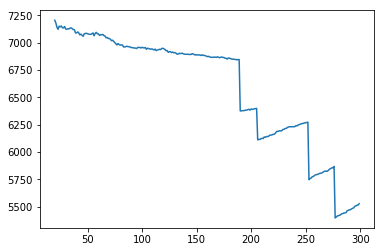

In [68]:
x_values = range(20, 300)
y_values = [0]*280
for i in range(20,300):
    store_covariance = calculate_covariance(i)
    print("covariance cal")
    y_values[i - 20] = calculate_bayes(store_covariance, i)
    print(y_values[i - 20], i)
plt.plot(x_values, y_values)
plt.show()

covariance cal
(3095, 1)
covariance cal
(5147, 2)
covariance cal
(6130, 3)
covariance cal
(6757, 4)
covariance cal
(6973, 5)
covariance cal
(7188, 6)
covariance cal
(7205, 7)
covariance cal
(7186, 8)
covariance cal
(7129, 9)
covariance cal
(7151, 10)
covariance cal
(7182, 11)
covariance cal
(7200, 12)
covariance cal
(7196, 13)
covariance cal
(7213, 14)
covariance cal
(7176, 15)
covariance cal
(7220, 16)
covariance cal
(7229, 17)
covariance cal
(7203, 18)
covariance cal
(7234, 19)


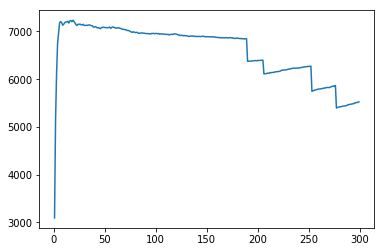

In [76]:
x_values_final = range(0, 300)
y_values_final = [0]*300
y_values_final[20:300] = y_values
for i in range(1,20):
    store_covariance = calculate_covariance(i)
    print("covariance cal")
    y_values_final[i] = calculate_bayes(store_covariance, i)
    print(y_values_final[i], i)
plt.plot(x_values_final[1:], y_values_final[1:])
plt.show()

In [80]:
# print(len(x_values_final))
# print(len(y_values_final))
# a = [0]*10
# len(a)
# a = range(1,10)
# len(a)
# print(x_values_final)
# print(y_values_final)
# x_values_final = x_values_final[1:]
# y_values_final = y_values_final[1:]
# plt.plot(x_values_final, y_values_final)
# plt.show()
x_values_final[y_values_final.index(max(y_values_final))]

19

In [42]:
## for i in range(10):
#     print(store_covariance[i][1])
# # a = np.array([3, 2, 1, 8, 7, 10, 20, 18, 14, 19])
# # b = np.array([4, 1, 4, 2, 6, 1, 8, 9, 20, 13, 16])
# # c = np.array(zip(a,b))
# # a_array = [[each**2, each1] for each, each1 in zip(a, b)]
# # a_array
# a = np.array([[1, 2], [5, 4], [2, 1], [8, 4], [0, 8], [6, 4]])
# b = np.array([5, 6, 8, 20, 4, 3, 9, 4, 15, 1])
# # b = b[b.argsort()[0:3]]
# # print(b)
# # c = stats.mode(b).mode[0]
# # print(c)
# # print(c.shape)
# # c
# # c = 4
# # ind = np.argpartition(b, -c)[0:c]
# # b[ind]
# heapq.nsmallest(3, range(len(b)), b.take)
# b = np.array([5, 6, 8, 20, 4, 3, 9, 4, 15, 1])
# b[np.argsort(b)]
a = np.array([[1, 2], [4, 3]])
b = np.array([[2, 6], [6, 1]])
c = np.array([[7, 3], [9, 0]])
a.T.dot(b)

array([[26, 10],
       [22, 15]])